## Rainfall Weather Forecasting

## Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
## Problem Statement: 
- Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
- Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


- Date  - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [1]:
#Importing the neccessary libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings ('ignore')

# Loading the dataset. 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


The above data frame shows the first 5 rows and the last 5 rows of the data set. 

I can observed date columns

I can observed missing values (NaNs) in some columns 

Some columns contains categorical and continuous datas.  

RainTomorrow is one of the target variable. which I consider to be classification problem 
Rainfall  is another target  variable which I consider to be a Regression problem. 


In [3]:
data.columns 

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

These are the respective columns in the dataset.

In [4]:
data.shape

(8425, 23)

The data shape shows data has 8425 rows and 23 columns 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

The above table shows result of the data information. 

As we can see the RangeIndex which the rows or data entries are 8425 and 23 columns 

Again we can observe missing values in the non-null counts. As we can see the counts are not completed in all the columns expect Date and Location columns which have complete counts.

data types. we have 16 columns that contains float data types and 7 columns that contains object data types. 

The memory usage is 1.5+ MB



In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Again, another confirmation that we have 16 columns containing float and 7 columns containing object data. And I noticed my date column is in object format, moving foward I have to convert to date format. 

In [7]:
# dropping duplicates 
data.drop_duplicates(inplace= True)
print('Shape of data after removing duplicates:', data.shape)


Shape of data after removing duplicates: (6762, 23)


Previously the shape of the data was (8425, 23)

In [8]:
obj_col = data.select_dtypes(include='object')
print('categorical columns:',obj_col.columns)

print('\n')

float_col = data.select_dtypes(include='float64')
print('numerical columns:',float_col.columns)

categorical columns: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


numerical columns: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


I have separated our object data columns from float data columns 

In [9]:
#Statistical summary of numerical columns
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6692.000000,6705.000000,6624.000000,3841.000000,3526.000000,5820.000000,6699.000000,6662.000000,6708.000000,6666.000000,5454.000000,5451.000000,4896.000000,4860.000000,6711.000000,6670.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561
std,5.569574,6.156128,10.591418,4.436790,3.785883,14.418577,9.833499,9.620043,17.251733,18.631086,6.712043,6.646755,2.908324,2.740519,5.744117,6.012896
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.500000,0.000000,2.600000,5.400000,30.000000,6.000000,9.000000,56.000000,38.000000,1013.100000,1010.300000,1.000000,1.000000,13.800000,18.300000
50%,13.200000,23.500000,0.000000,4.600000,9.000000,37.000000,11.000000,17.000000,68.000000,50.000000,1017.600000,1015.100000,5.000000,5.000000,18.000000,22.100000
75%,17.500000,28.400000,0.800000,7.000000,10.800000,48.000000,19.000000,24.000000,81.000000,63.000000,1022.200000,1019.600000,7.000000,7.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


The above data shows the statistical summary of our numerical data. 

As we can see the count for each numerical columns are not complete that means some data are missing 

The mean value  in Rainfall column is (2.780148) is smaller than std ((10.591418)) 

On the Min, I  can observed zero values in columns Rainfall, Evaporation, Sunshine, WindSpreed9am WindSpeed3pm, Cloud3pm. 

25% we can see in columns like Rainfall column the value with the min are zero. 

50% we can see has zero value in Rainfall column 

75%, we can see there is slight difference between the 75% and 50% values on the Rainfall column. 

On the same Rainfall column we can see the difference between the Max and 75% is huge which can cause skewness.  


In [10]:
data.isnull().sum().to_frame('missing values')

,missing values
Date,0
Location,0
MinTemp,70
MaxTemp,57
Rainfall,138
Evaporation,2921
Sunshine,3236
WindGustDir,942
WindGustSpeed,942
WindDir9am,794


These are the total numbers of missing values in each columns on the above data frame 

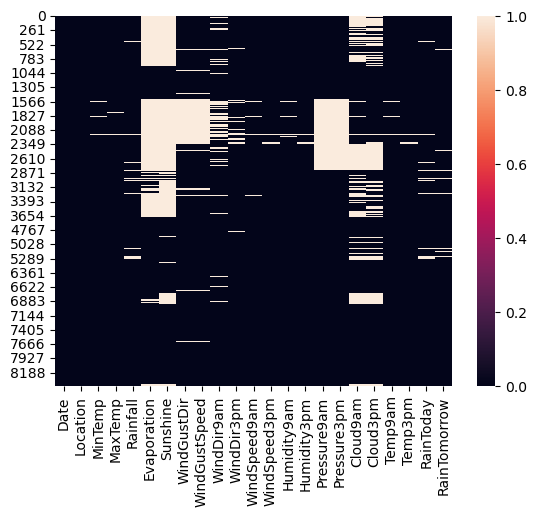

In [331]:
plt.figure()
sns.heatmap(data.isnull())
plt.show()

Again, I have used the heatmap to confirmed that there are missing values in the above columns. 

In [332]:
# Checking unique values of each columns 
data.nunique().to_frame('Unique Value')

,Unique Value
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


The above data frame shows the unique values of each columns 

In [11]:
# Checking values counts for object data 
for i in  obj_col:
    print(obj_col[i].value_counts())
    print('='*75)

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
E      518
SW     465
N      459
W      434
WSW    420
WNW    398
SSE    390
S      376
SE     370
ENE    357
NE     300
SSW    299
NW     296
NNE    287
ESE    267
NNW    184
Name: WindGustDir, dtype: int64
N      609
SW     590
NW     463
SE     439
ENE    397
WSW    394
SSW    368
NE     364
E      338
NNE    337
S      324
WNW    301
SSE    300
W      299
ESE    229
NNW    216
Name: WindDir9am, dtype: int64
SE     677
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E

According to the value counts of our object data columns we can see that there are no blank spaces and repeated data. 

In [12]:
# Checking values counts for float64 data 
for i in float_col:
    print(float_col[i].value_counts())
    print('='*75)

13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64
19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: Rainfall, Length: 250, dtype: int64
4.0      141
3.0      125
2.2      118
2.4      116
2.6      116
        ... 
145.0      1
33.8       1
59.2       1
20.8       1
0.7        1
Name: Evaporation, Length: 116, dtype: int64
0.0     119
11.1     61
11.0     59
11.2     59
9.2      56
       ... 
2.5       5
13.6      4
13.8      2
13.9      2
13.5      1
Name: Sunshine, Length: 140, dtype: int64
39.0     346
35.0     341
37.0     332
33.0     317
31.0     305
30.0     302
41.0     285
28.0     285
43.0     237
2

According to the value counts of our float data columns we can see that there are no blank spaces and repeated data. 

## Data Manipulation Preprocessing

In [13]:
data['Date'] = pd.to_datetime(data.Date, format = '%Y-%m-%d')
data.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

Our date column has been changed to datetime64[ns]

In [14]:
#Extracting Day from Date
data['Day'] = pd.to_datetime(data.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date
data['Month'] = pd.to_datetime(data.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date
data['Year'] = pd.to_datetime(data.Date, format="%d/%m/%Y").dt.year

In [15]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


We have addition 3 columns Day, Month and Year. So lets drop our original date columns since we have our day month and year colums

In [16]:
# Dropping Date column
data.drop(columns=['Date'],axis=1,inplace=True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


Date column have been dropped 

 ### Treating missing values with fillna, instead of dropping them it will be risky but fillna is safer. 

In [17]:
# Using fillna to treat Nans. Using mean for continuons columns and using mode for categorical columns
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mode()[0])
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine'] = data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

data.isnull().sum().to_frame('missing values')

,missing values
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


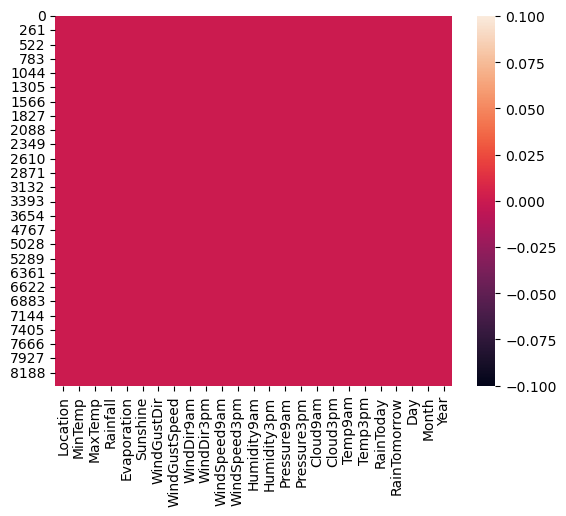

In [18]:
sns.heatmap(data.isnull())
plt.show()

Nulls values have been treated. 

In [19]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.723410,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,15.737208,6.462141,2012.052203
std,5.540667,6.130123,10.490138,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845,8.793898,3.377471,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,8.000000,4.000000,2010.000000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000,16.000000,6.000000,2012.000000
75%,17.400000,28.400000,0.800000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


# Lets Visualize our categorical columns (Univariate)

In [20]:
obj_col.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

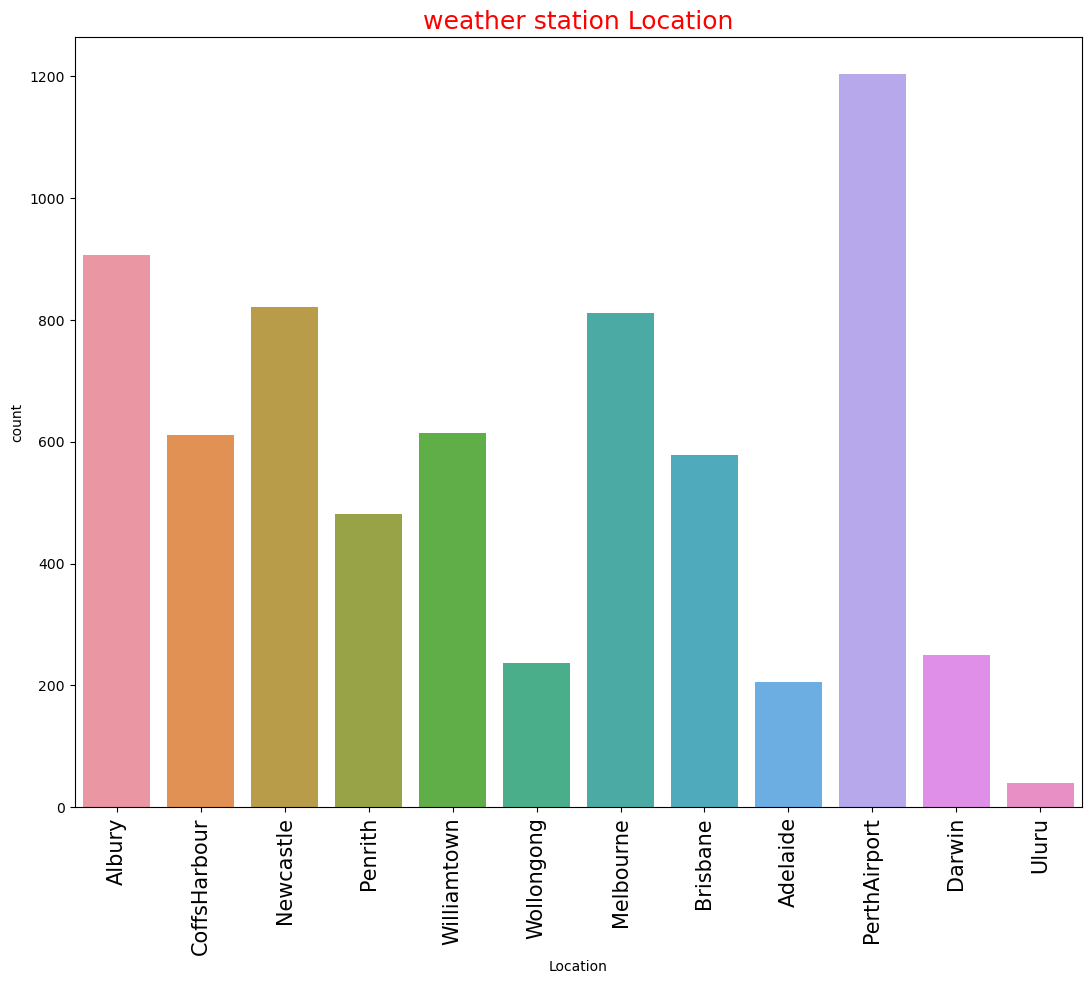

In [247]:
plt.figure(figsize=(13,10))
sns.countplot(x='Location',data = data)
plt.title('weather station Location', fontsize=18, color ='r')
plt.xticks(rotation=90,fontsize= 15)
plt.show()

According to the result of the count plot we can see that the PerthAirport has the highest rainfall, while Uluru has the least rainfall 

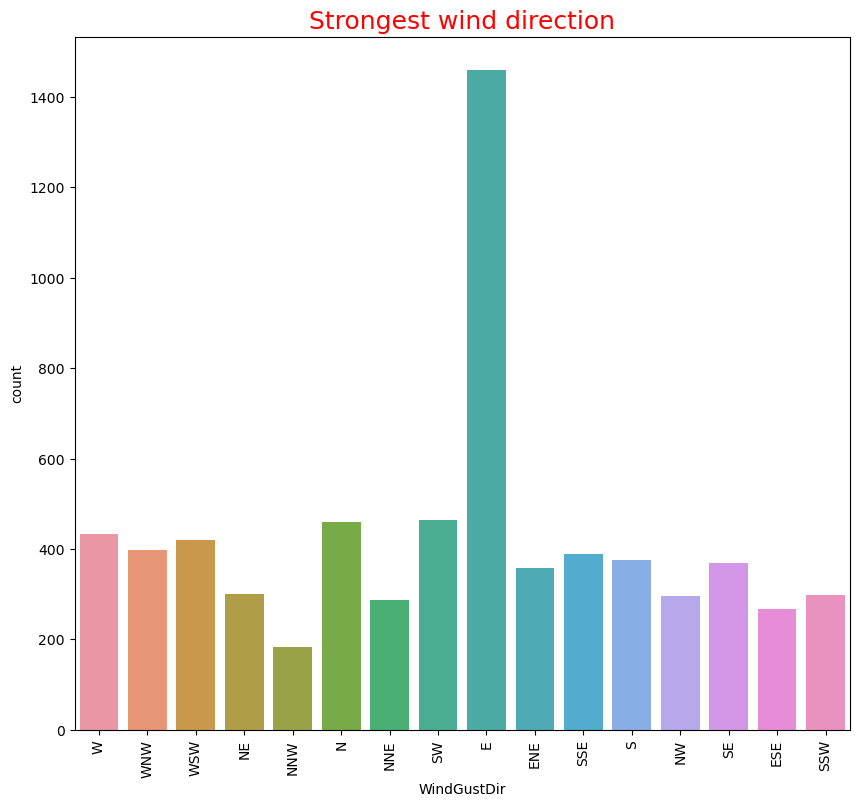

In [248]:
plt.figure(figsize=(10,9))
sns.countplot(x='WindGustDir',data = data)
plt.title('Strongest wind direction', fontsize=18, color ='r')
plt.xticks(rotation=90,fontsize= 10)
plt.show()

East[E] has the strongest wind direction within 24hrs to midnight

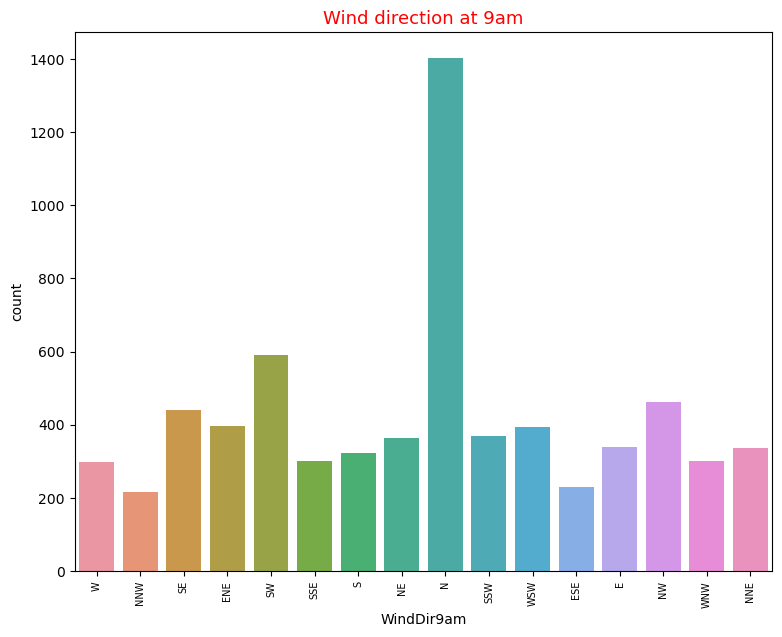

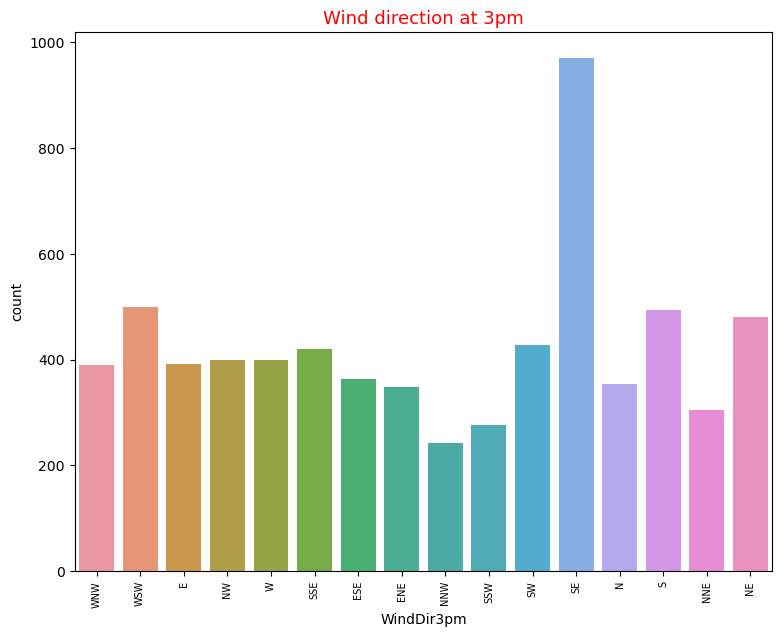

In [249]:
plt.figure(figsize=(9,7))
sns.countplot(x='WindDir9am',data = data)
plt.title('Wind direction at 9am', fontsize=13, color ='r')
plt.xticks(rotation=90,fontsize= 7)
plt.show()


plt.figure(figsize=(9,7))
sns.countplot(x='WindDir3pm',data = data)
plt.title('Wind direction at 3pm', fontsize=13, color ='r')
plt.xticks(rotation=90,fontsize= 7)

plt.show()

The first plot shows  the North (N) has the highest wind direction when the time is 9am.Why NNW and ESE have the least wind direction at same 9am 

The second plot shows that SE has the highest wind deirect when the time is 3pm and NNW has the least wind direction at same time 3pm 

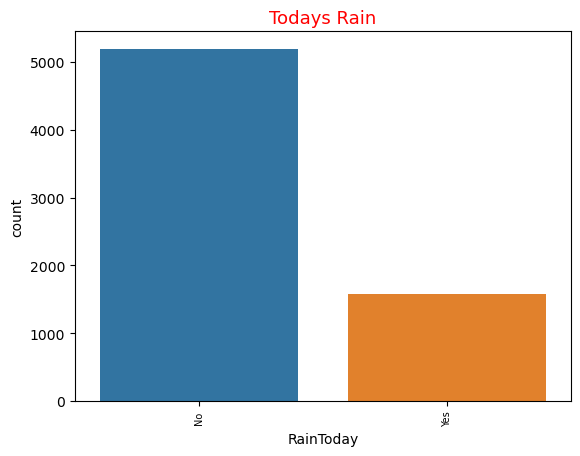

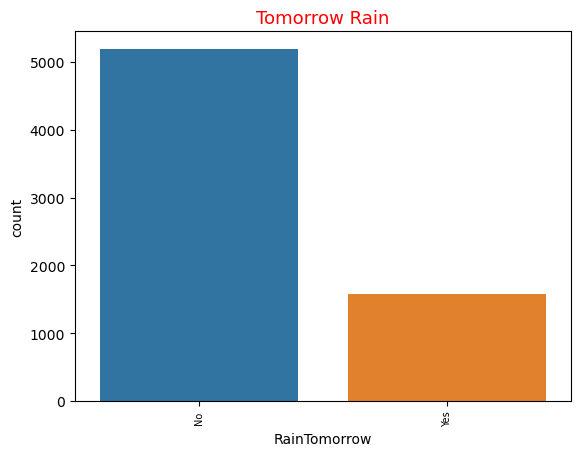

In [117]:
plt.figure()
sns.countplot(x='RainToday',data = data)
plt.title('Todays Rain', fontsize=13, color ='r')
plt.xticks(rotation=90,fontsize= 7)
plt.show()


plt.figure()
sns.countplot(x='RainTomorrow',data = data)
plt.title('Tomorrow Rain', fontsize=13, color ='r')
plt.xticks(rotation=90,fontsize= 7)
plt.show()

The two plots shows the count or amount of todays  and next day rain fall and as we can see according to the result No in both plots have the highest numbers. Meaning the number/amount of time rain will not fall is higher than the number of time rain will fall

# Bivariate Analysis. 

Text(0.5, 1.0, 'RainTomorrow Location ')

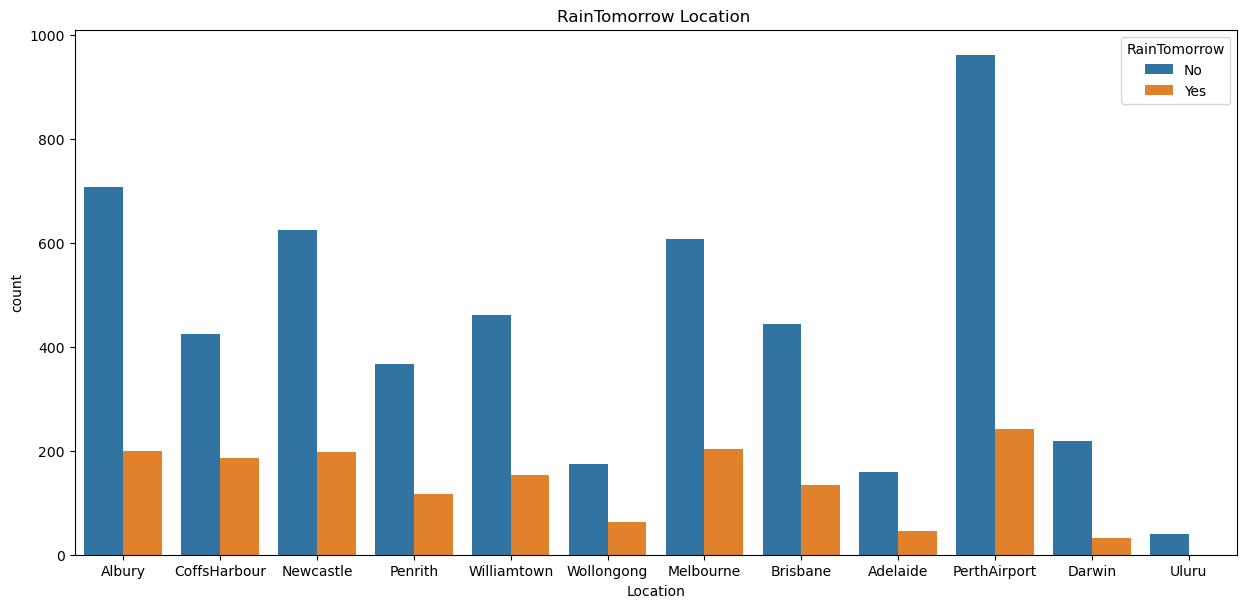

In [27]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,2)
sns.countplot(x='Location',hue='RainTomorrow',data=data)
plt.title('RainTomorrow Location ')

PerthAirport has the highest chances when rain will fall tomorrow. 

why Uluru has the lowest chance when there will be no rain tomorrow 

Text(0.5, 1.0, 'MinTemp vs RainTomorrow')

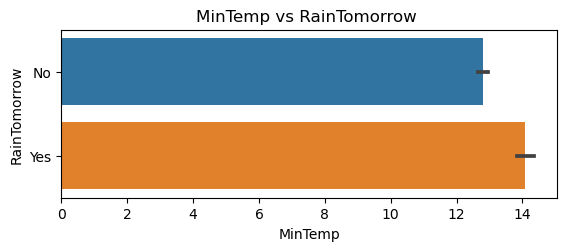

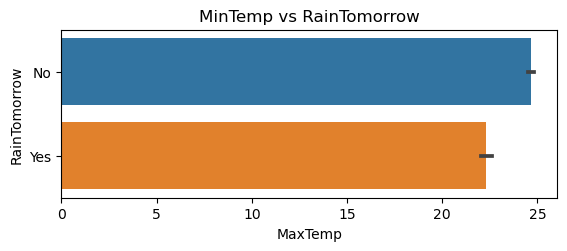

In [31]:
plt.figure()
plt.subplot(2,1,2)
sns.barplot(x='MinTemp',y ='RainTomorrow',data=data)
plt.title('MinTemp vs RainTomorrow ')


plt.figure()
plt.subplot(2,1,2)
sns.barplot(x='MaxTemp',y ='RainTomorrow',data=data)
plt.title('MinTemp vs RainTomorrow')

The firsy plot shows at min temperature of 13 there is a possibility there wont be rain tomorrow, also it showing that at min temperature of 14 there is a possibility there will be rain tomorrow. 

why the second plot shows at max temperature of 25 there is a possibility there won't be rain fall tomorrow, also showing that at max temperature of of 23 there is a possible there will be rain fall tomorrow. 

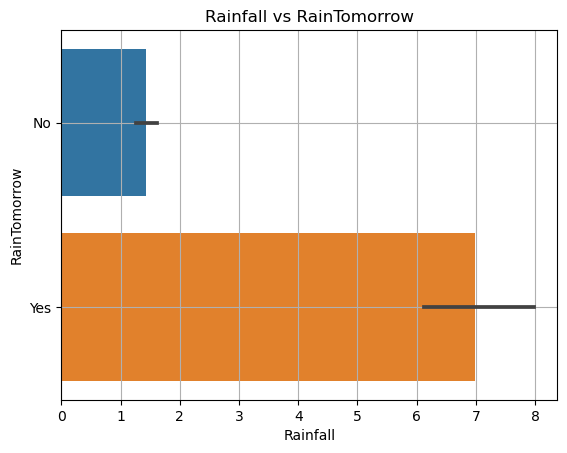

In [34]:
plt.figure()
sns.barplot(x='Rainfall',y='RainTomorrow',data=data)
plt.title('Rainfall vs RainTomorrow')
plt.grid(True)


Chances of rain falling tomorrow is far higher than chances of rain not falling tomorrow. 

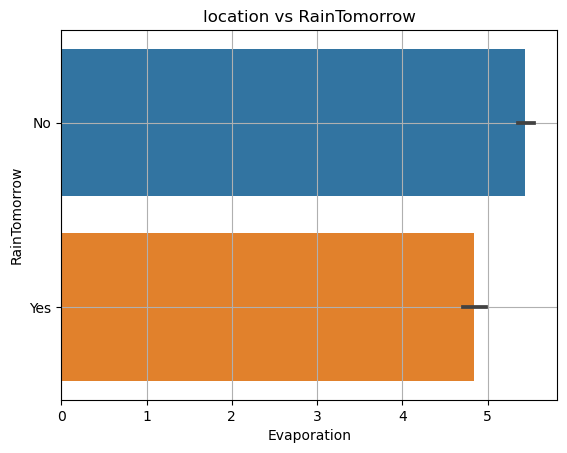

In [35]:
plt.figure()
sns.barplot(x='Evaporation',y='RainTomorrow',data=data)
plt.title('location vs RainTomorrow')
plt.grid(True) 

According to the graph we can see that when its Evaporate beyond 5mm there won't be rain tomorrow 

But when is evaporate below 5mm, possible there will be rainfall tomorrow. 

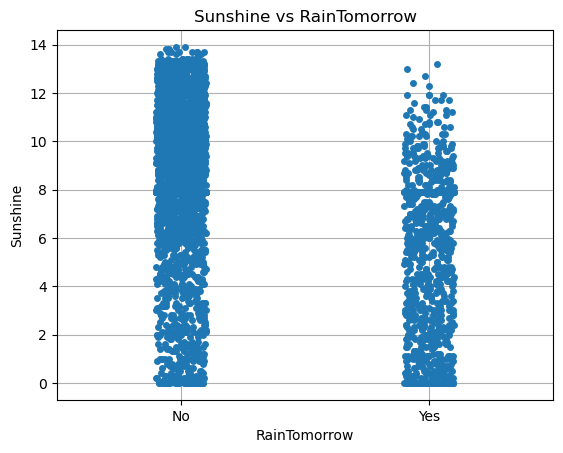

In [39]:
plt.figure()
sns.stripplot(x='RainTomorrow',y= 'Sunshine', data=data)
plt.title('Sunshine vs RainTomorrow')
plt.grid(True) 

According to the plot, we can see that there is a possibility there will be no rain tomorrow when it sunshine gets to 14 

Also, there is still possibility that it will rain tomorroe when the sunshine gets to below 14. 

Text(0.5, 1.0, 'WindGustDiron vs RainTomorrow')

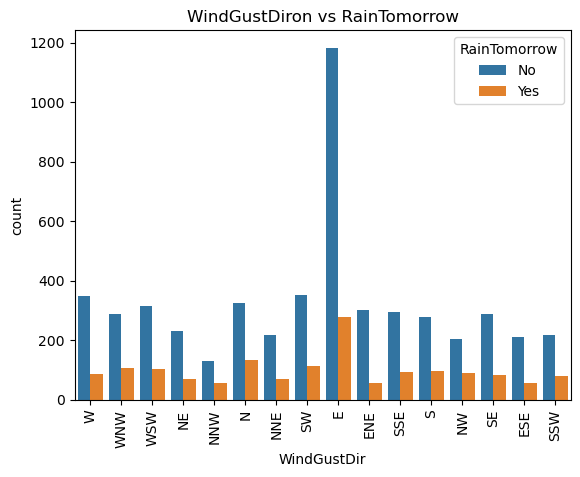

In [44]:
sns.countplot(x='WindGustDir',hue ='RainTomorrow',data=data)
plt.xticks(rotation=90)
plt.title('WindGustDiron vs RainTomorrow')

 E has the strongest wind direction within 24hrs to midnight and there is high chances of no raintomorrow compared to the other direction. Also E has the highest chances of rain tomorrow. 

Text(0.5, 1.0, 'WindGustSpeed vs RainTomorrow')

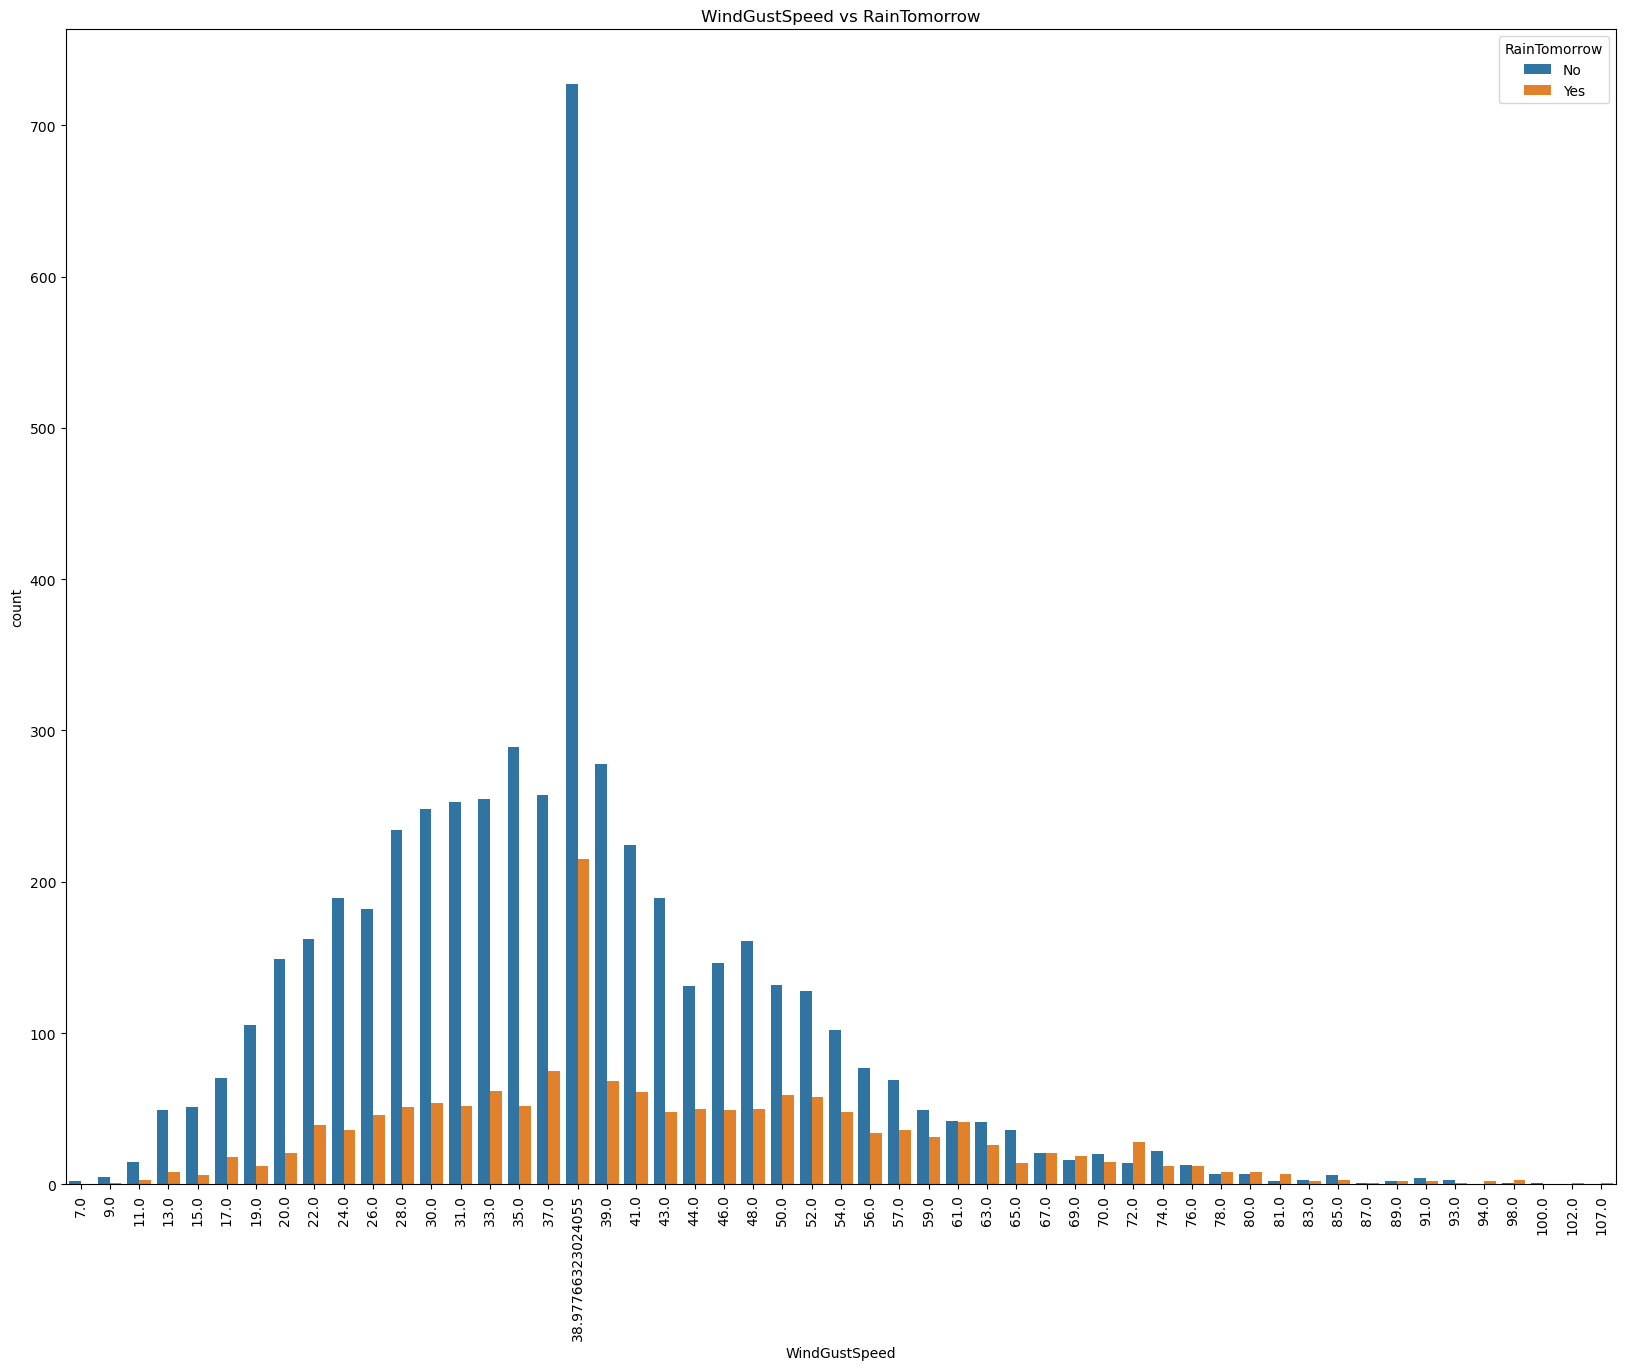

In [55]:
plt.figure(figsize=(20,15))
sns.countplot(x='WindGustSpeed',hue ='RainTomorrow',data=data)
plt.xticks(rotation=90)
plt.title('WindGustSpeed vs RainTomorrow')

At a windspeed of 39.40km it has the highest possibility it rain tomorrow and also has the highest possiblity it will not rain tomorrow compared to any other speed. 

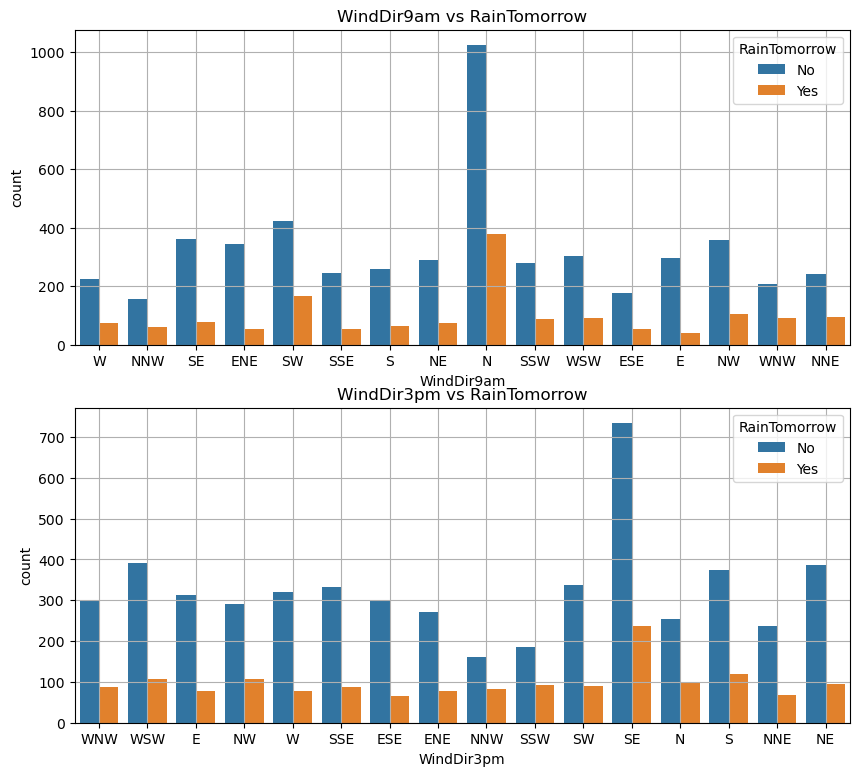

In [51]:
plt.figure(figsize=(10,9))
plt.subplot(2,1,1)
sns.countplot(x='WindDir9am',hue ='RainTomorrow',data=data)
plt.title('WindDir9am vs RainTomorrow')
plt.grid(True)


plt.subplot(2,1,2)
sns.countplot(x='WindDir3pm',hue='RainTomorrow',data=data)
plt.title('WindDir3pm vs RainTomorrow')
plt.grid(True)

According to the wind direction at 9am, N direction has the highest posibility to rain and not rain tomorrow.Why NNWhas the lowest possibility not rain tomorrow, also E direction has the lowest possibility to rain tomorrow 

According to the wind direction at 3pm SE wind direction has the highest possiblity to rain and not to rain tomorrow why NNE has the lowest possibility to rain, again NNW has the lowest possibity not to rain tomorrow 



Text(0.5, 1.0, 'Humidity3pm vs RainTomorrow')

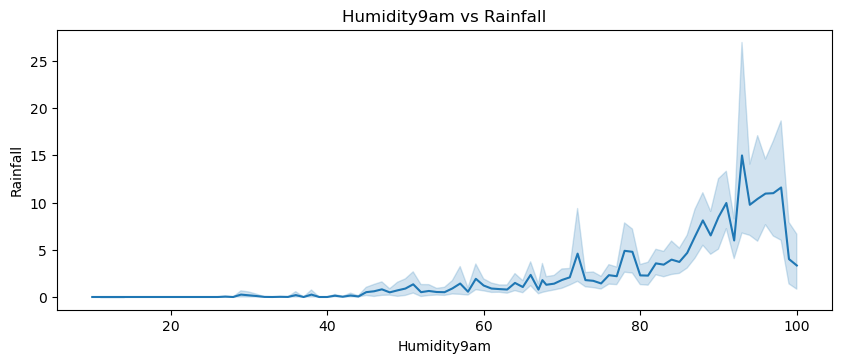

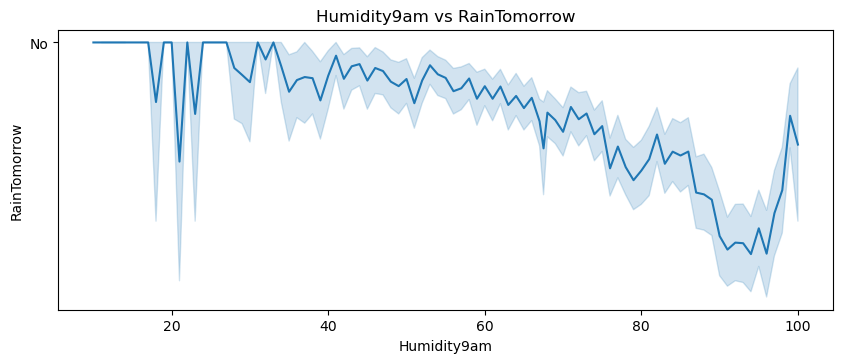

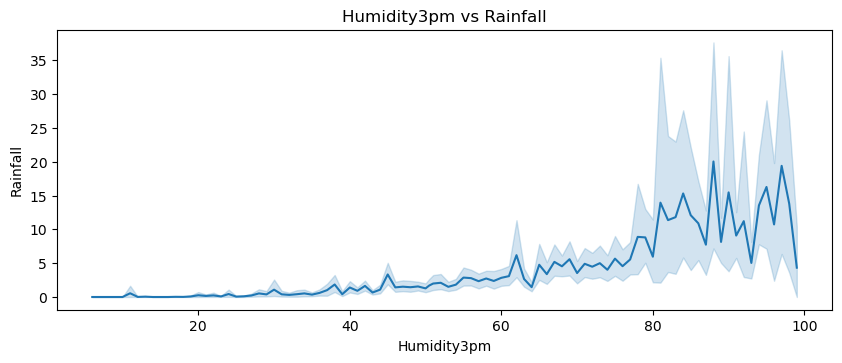

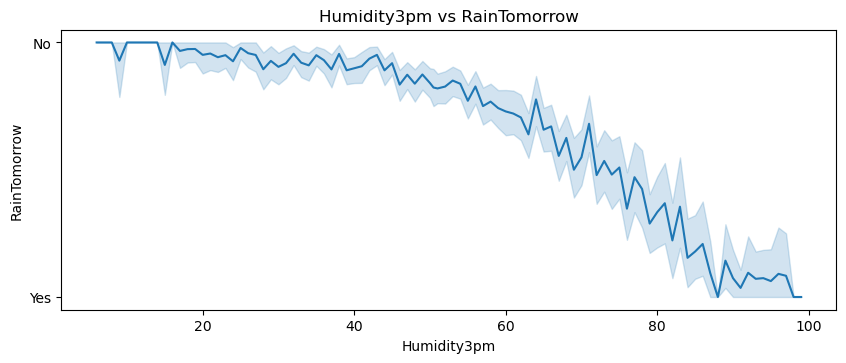

In [172]:
plt.figure(figsize=(10,8))
ax=plt.subplot(2,1,1)
sns.lineplot(x='Humidity9am',y='Rainfall',data=data)
plt.title('Humidity9am vs Rainfall')

plt.figure(figsize=(10,8))
ax=plt.subplot(2,1,1)
sns.lineplot(x='Humidity9am',y='RainTomorrow',data=data)
plt.title('Humidity9am vs RainTomorrow')

plt.figure(figsize=(10,8))
ax= plt.subplot(2,1,1)
sns.lineplot(x='Humidity3pm',y='Rainfall',data=data)
plt.title('Humidity3pm vs Rainfall')

plt.figure(figsize=(10,8))
ax= plt.subplot(2,1,1)
sns.lineplot(x='Humidity3pm',y='RainTomorrow',data=data)
plt.title('Humidity3pm vs RainTomorrow')

The above plots shows us that when the humidity is almost at 100% there is a possibility there will be rain. 

Text(0.5, 1.0, 'Pressure3pm vs RainTomorrow')

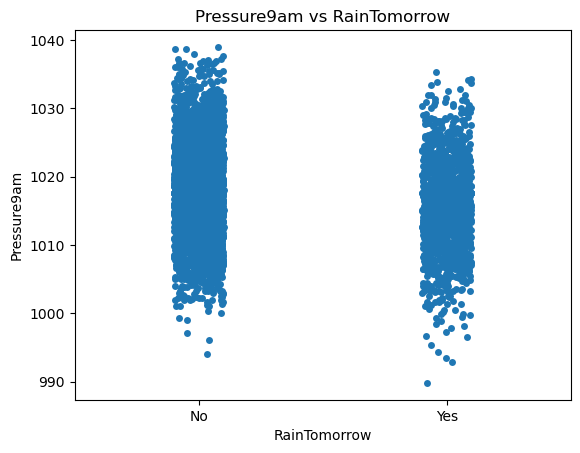

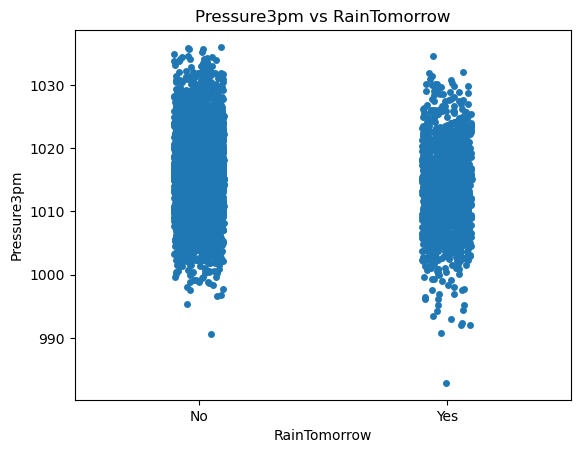

In [69]:
plt.figure()
sns.stripplot(x='RainTomorrow',y='Pressure9am',data=data)
plt.title('Pressure9am vs RainTomorrow')


plt.figure()
sns.stripplot(x='RainTomorrow',y='Pressure3pm',data=data)
plt.title('Pressure3pm vs RainTomorrow')

The first plot show the Atmospherical pressure at 9am which is about 1040 hpa and there is possibility there won't be no rain. Same prediction at 3pm 



Text(0.5, 1.0, 'Cloud3pm vs RainTomorrow')

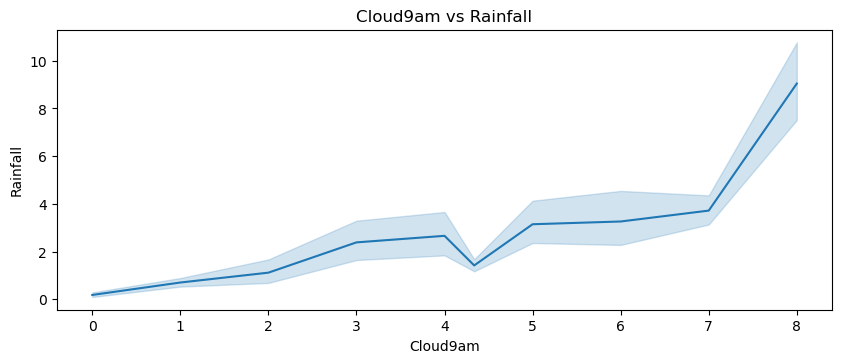

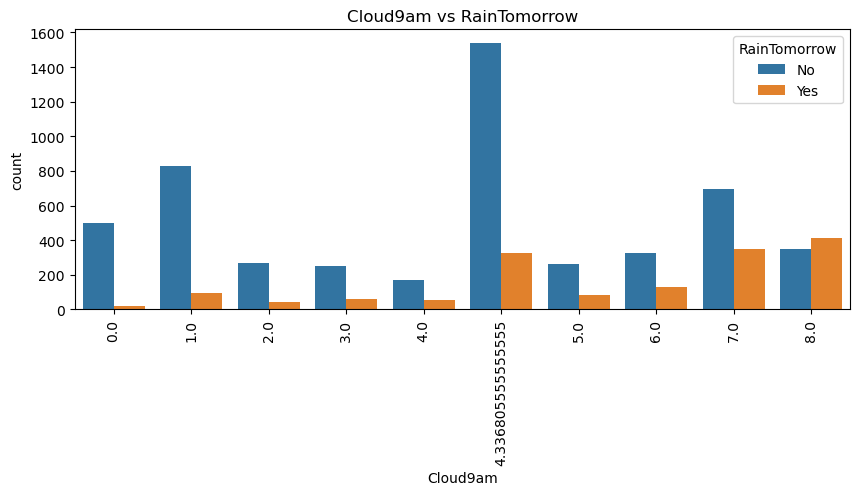

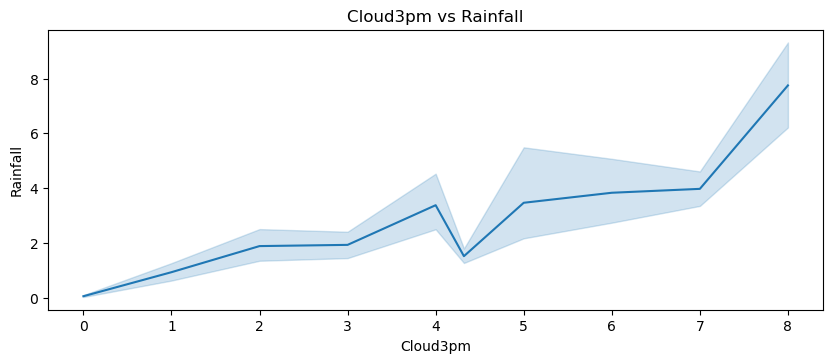

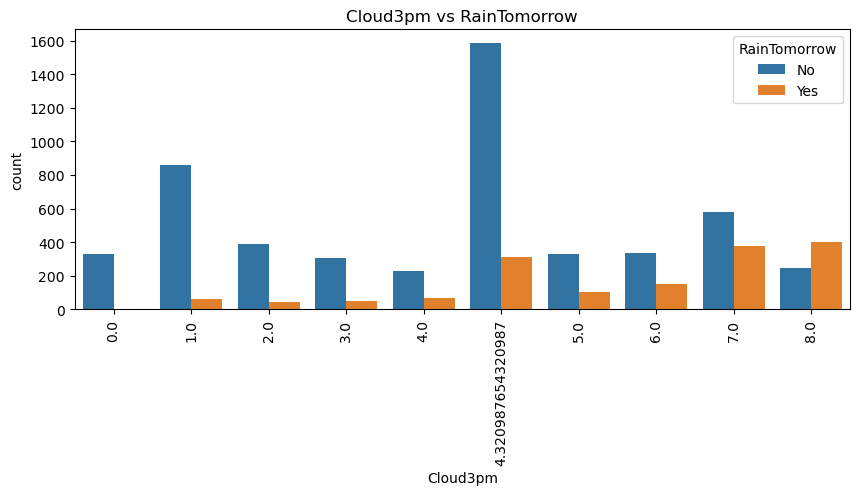

In [79]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
ax=sns.lineplot(x='Cloud9am',y='Rainfall',data=data)
plt.title('Cloud9am vs Rainfall')

plt.figure(figsize=(10,8))
ax=plt.subplot(2,1,1)
sns.countplot(x='Cloud9am',hue='RainTomorrow',data=data)
plt.xticks(rotation=90)
plt.title('Cloud9am vs RainTomorrow')

plt.figure(figsize=(10,8))
ax= plt.subplot(2,1,1)
sns.lineplot(x='Cloud3pm',y='Rainfall',data=data)
plt.title('Cloud3pm vs Rainfall')

plt.figure(figsize=(10,8))
ax= plt.subplot(2,1,1)
sns.countplot(x='Cloud3pm',hue='RainTomorrow',data=data)
plt.xticks(rotation=90)
plt.title('Cloud3pm vs RainTomorrow')

The above line plots shows there are linear relationship. According to the cloud9am/cloud3pm to raintomrrow, at cloud fraction of 4.3 there is higher chances of rain not falling compared to other fraction  , while when the cloud is at fraction  8.0 it has the maximum chances of rainomorrow compared to other fraction. 

Text(0.5, 1.0, 'Temp3pm vs RainTomorrow')

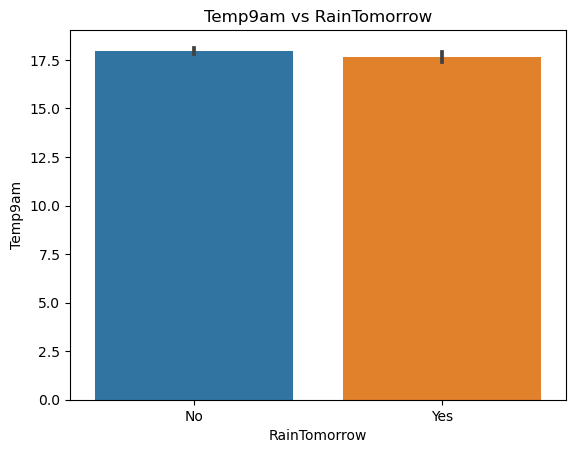

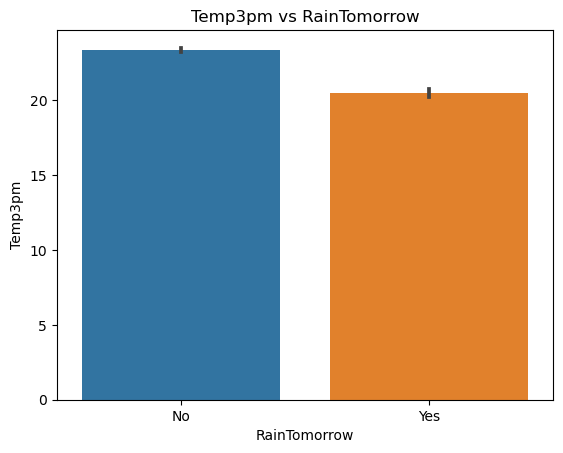

In [73]:
plt.figure()
sns.barplot(x='RainTomorrow',y='Temp9am',data=data)
plt.title('Temp9am vs RainTomorrow')

plt.figure()
sns.barplot(x='RainTomorrow',y='Temp3pm',data=data)
plt.title('Temp3pm vs RainTomorrow')

First plot show temp at 9am, accordng to the plot the temp at that time is 17.5 dc and possibility of rain falling tomorrow or not are same. 

Second plot shows temperature at 3pm. According to the plot the temp at that time is beyond 20 dc and the possibility of rain not falling tomorrow is higher than rain falling. 

Text(0.5, 1.0, 'Year vs RainTomorrow')

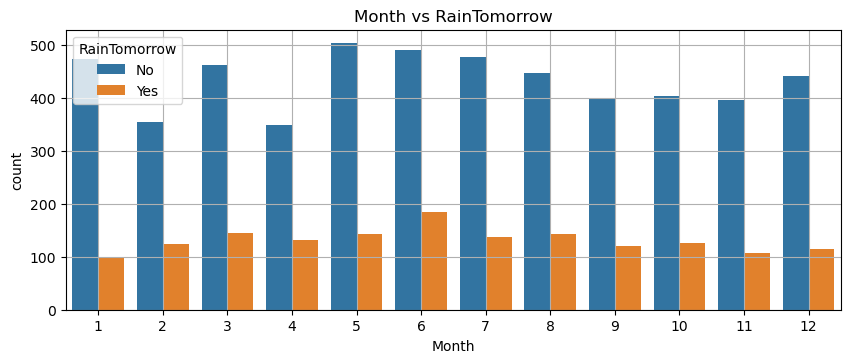

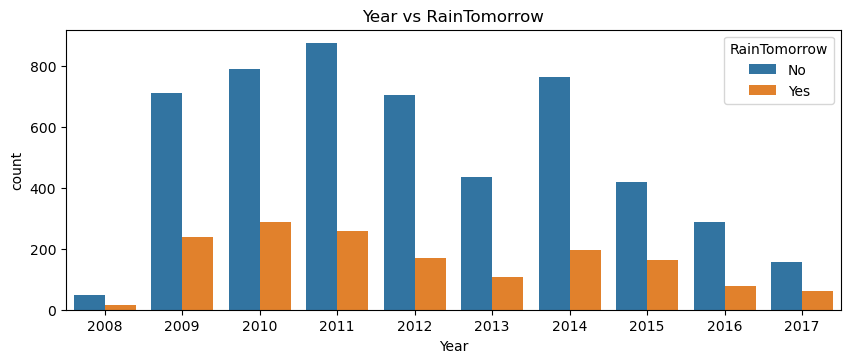

In [77]:

plt.figure(figsize=(10,8))
ax=plt.subplot(2,1,1)
sns.countplot(x='Month',hue='RainTomorrow',data=data)
plt.title('Month vs RainTomorrow')
plt.grid(True)

plt.figure(figsize=(10,8))
ax= plt.subplot(2,1,1)
sns.countplot(x='Year',hue='RainTomorrow',data=data)
plt.title('Year vs RainTomorrow')

The first plot shows the month with maximum rain. According to the result June happen to be the month with the highest rain. Why May has the highest possibility of rain not falling.  

The second graph shows the amount of raintomorrow with 2008 to 2017. According to the result, 2011 happened to be the year maximum chances of rain not fallin and 2010 is the year we had the maximum rainfall compared to other years. Why in 2008 we have lowest rain not falling and rainfall. 

Text(0.5, 1.0, 'MinTemp vs MaxTemp')

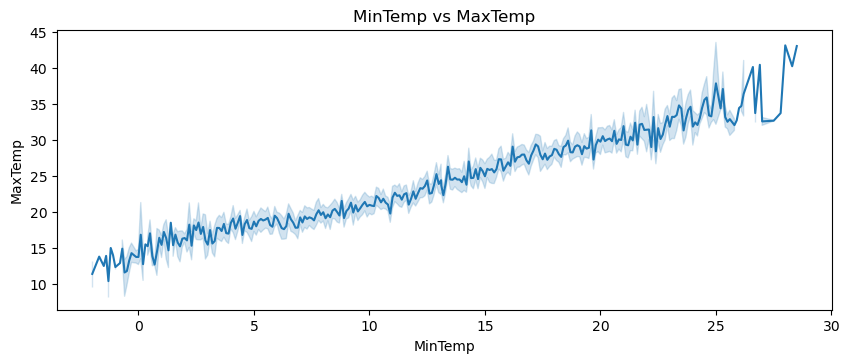

In [80]:
plt.figure(figsize=(10,8))
ax= plt.subplot(2,1,1)
sns.lineplot(x='MinTemp',y='MaxTemp',data=data)
plt.title('MinTemp vs MaxTemp')


The above line plot shows there is a linear  relationship between MinTemp and maxTemp

Text(0.5, 1.0, 'WindGustDir vs WindGustSpeed')

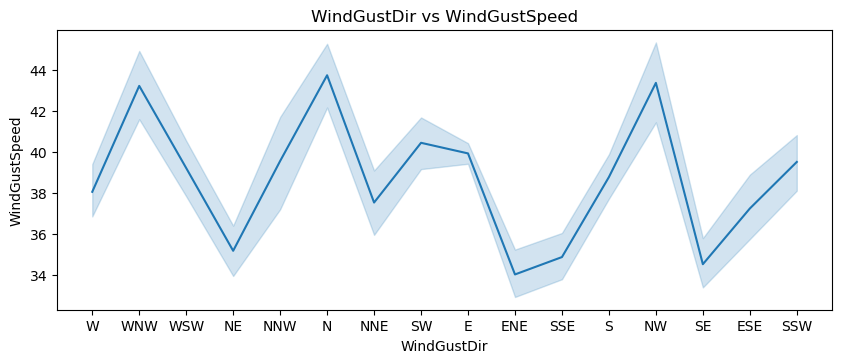

In [90]:
plt.figure(figsize=(10,8))
ax= plt.subplot(2,1,1)
sns.lineplot(x='WindGustDir',y='WindGustSpeed',data=data)
plt.title('WindGustDir vs WindGustSpeed')

The above graph shows there is a linear relation between WinGustDir and WindGustSpeed. 

Text(0.5, 1.0, 'WindDir9am vs WindSpeed9am')

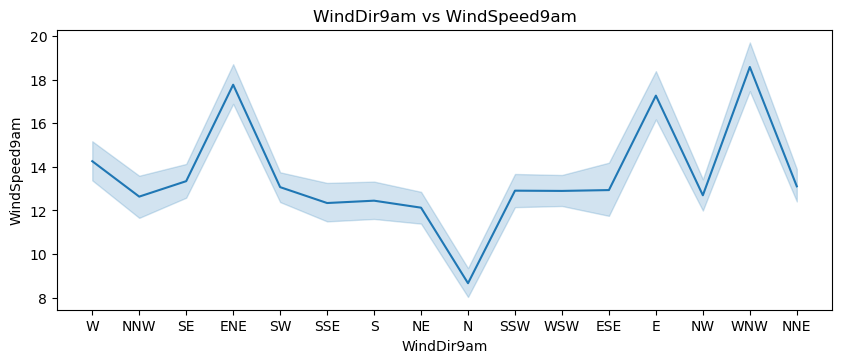

In [97]:
plt.figure(figsize=(10,8))
ax= plt.subplot(2,1,1)
sns.lineplot(x='WindDir9am',y='WindSpeed9am',data=data)
plt.title('WindDir9am vs WindSpeed9am')

The above plot shows there is a linear relationship between both features 

Text(0.5, 1.0, 'Cloud9am vs Temp9am')

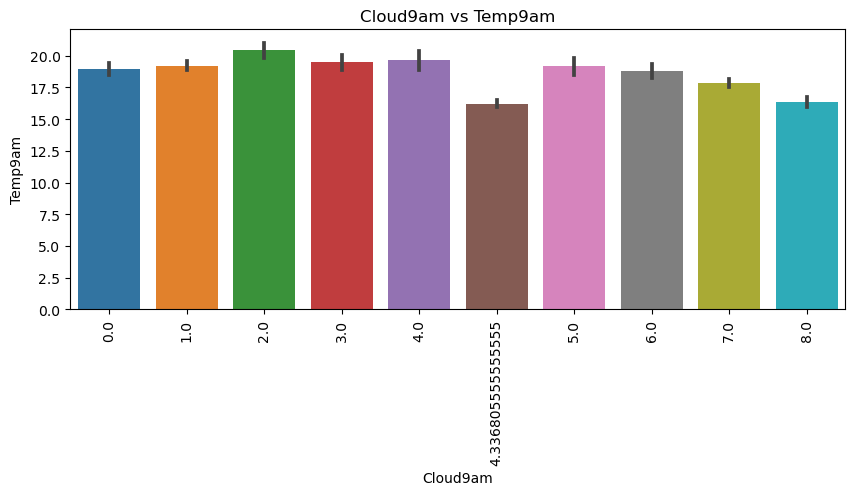

In [101]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.barplot(x='Cloud9am',y='Temp9am',data=data)
plt.xticks(rotation=90)
plt.title('Cloud9am vs Temp9am')

When the Fraction of sky obscured by cloud is 2.0, it has the highest temperature of 20.0 compared to others which makes the earth moderately warm, that is not too hot or cold.  

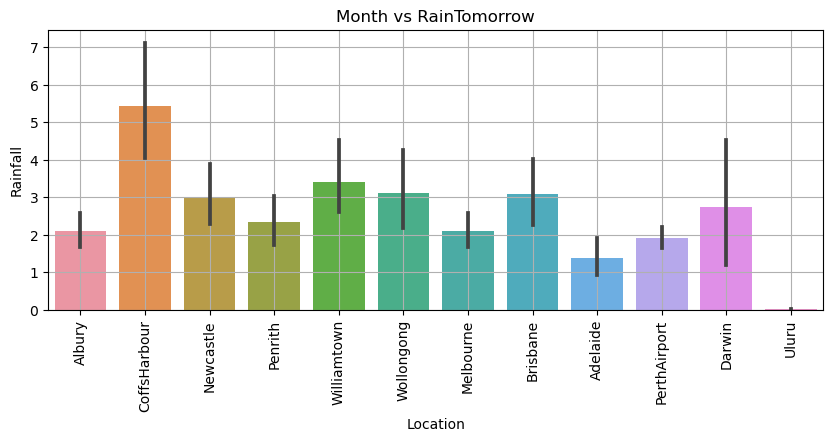

In [108]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.barplot(x='Location',y ='Rainfall',data=data)
plt.xticks(rotation=90)
plt.title('Month vs RainTomorrow')
plt.grid(True)


According to the result CoffsHarbour is location with the highest rainfall. Hoever, Uluru has the lowest rainfall location 

Text(0.5, 1.0, 'RainTomorrow vs Evaporation')

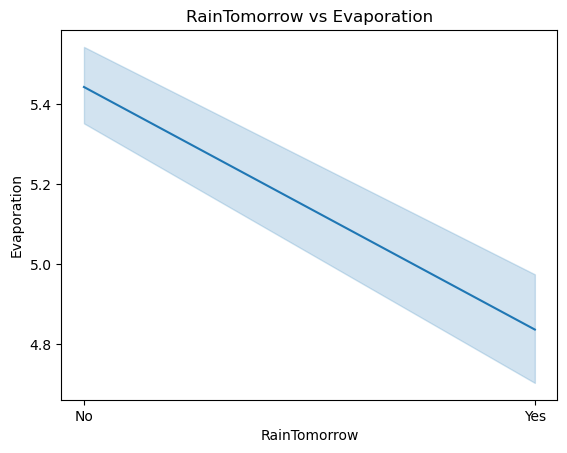

In [105]:
plt.figure()
sns.lineplot(x='RainTomorrow',y='Evaporation',data=data)
plt.title('RainTomorrow vs Evaporation')

According to the graph there is a linear relation between Rain and Evaporation. When there is evaporation of 5.4mm we can see the possibility of rain falling tomorrow is yes. 

# Multivariate Analysis. 

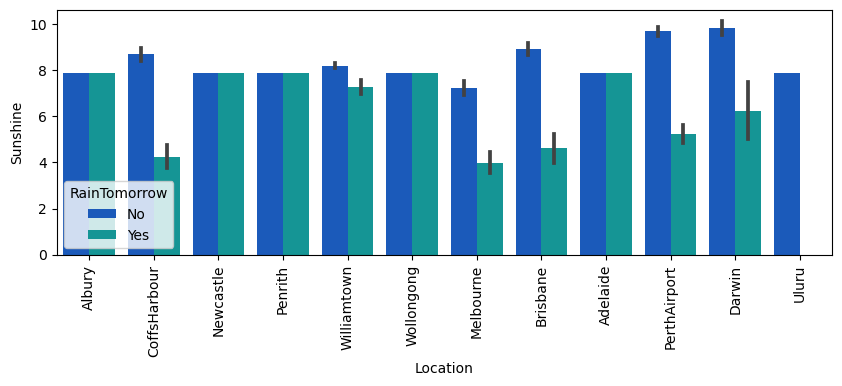

In [116]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.barplot(y='Sunshine',x='Location',hue='RainTomorrow',data=data, palette='winter')
plt.xticks(rotation=90)
plt.show()

According to the plot Darwin location has the possibility of sun shining than others location also there is possibility it will also rain in Darwin.

Albury, Newcastle, Wollongong have same possibility for the sun shining and also for the rain faiiling. 

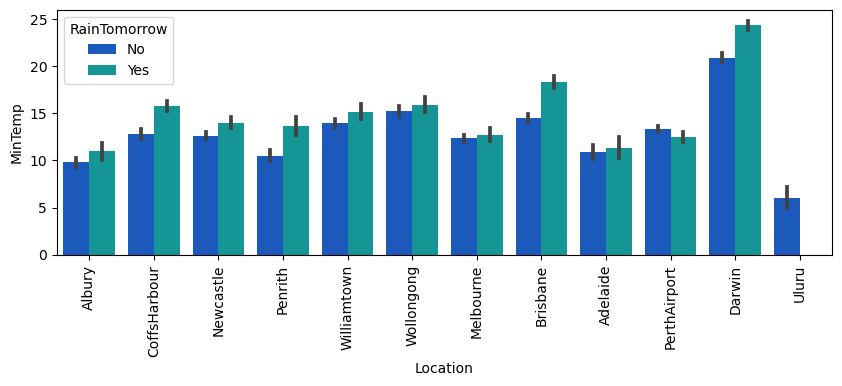

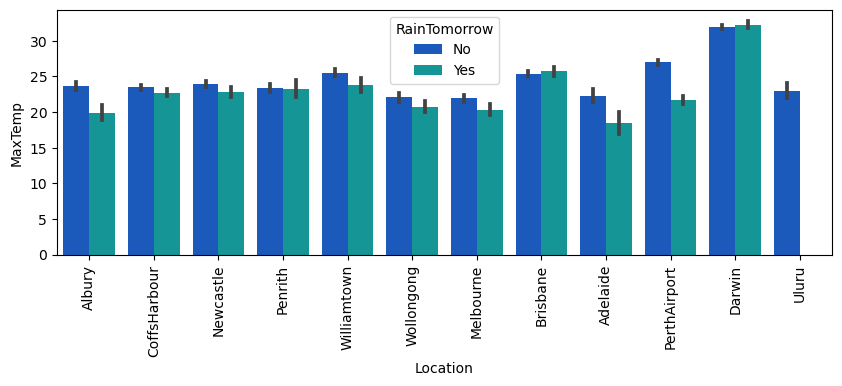

In [118]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.barplot(y='MinTemp',x='Location',hue='RainTomorrow',data=data, palette='winter')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.barplot(y='MaxTemp',x='Location',hue='RainTomorrow',data=data, palette='winter')
plt.xticks(rotation=90)
plt.show()

The first plot shows at minimum temperature of 6 there will be no rain in Uluru compare to other region. 

Why the second plot shows at maximum temperature of 30 degree the possibility of rain falling and not falling tomorrow at Darwin is comparative almost same. 

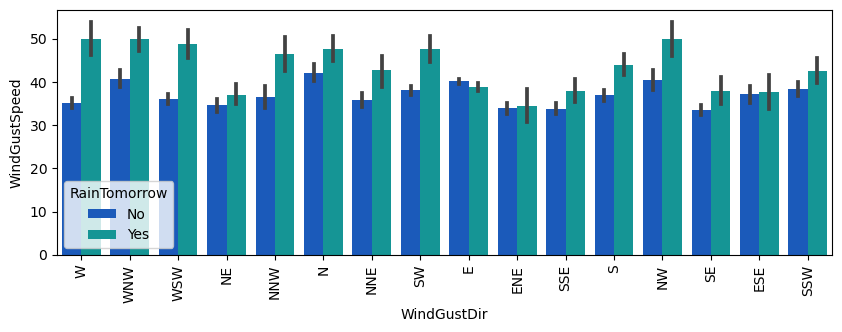

In [123]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.barplot(y='WindGustSpeed',x='WindGustDir',hue='RainTomorrow',data=data, palette='winter')
plt.xticks(rotation=90)
plt.show()

The above plot shows the windgust speed and wingust direction and we can see that west and NorthWest have the highest possibility it will rain tomorrow compare to the rain not falling. 

Also in East the raining not falling is slight higher that rain falling. 

<Figure size 1000x700 with 0 Axes>

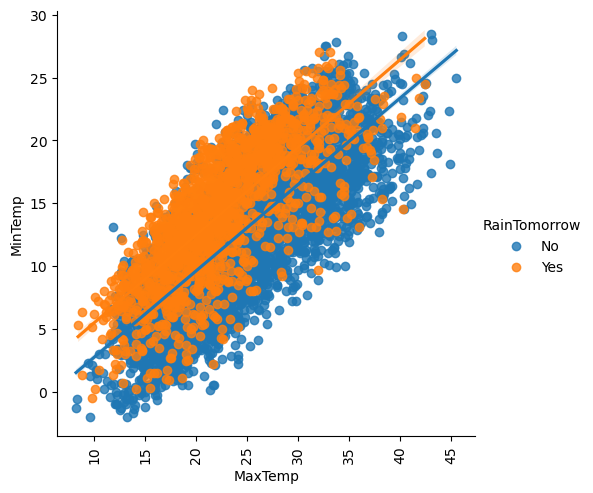

In [128]:
plt.figure(figsize=(10,7))
sns.lmplot(y='MinTemp',x='MaxTemp',hue='RainTomorrow',data=data)
plt.xticks(rotation=90)
plt.show()

There is a linear relationship between the two features 

<Figure size 1000x700 with 0 Axes>

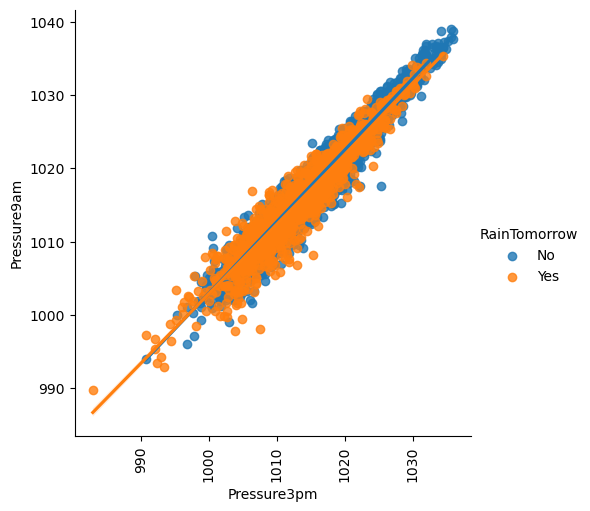

In [135]:
plt.figure(figsize=(10,7))
sns.lmplot(y='Pressure9am',x='Pressure3pm',hue='RainTomorrow',data=data)
plt.xticks(rotation=90)
plt.show()


Strong linear relationship between the two features 

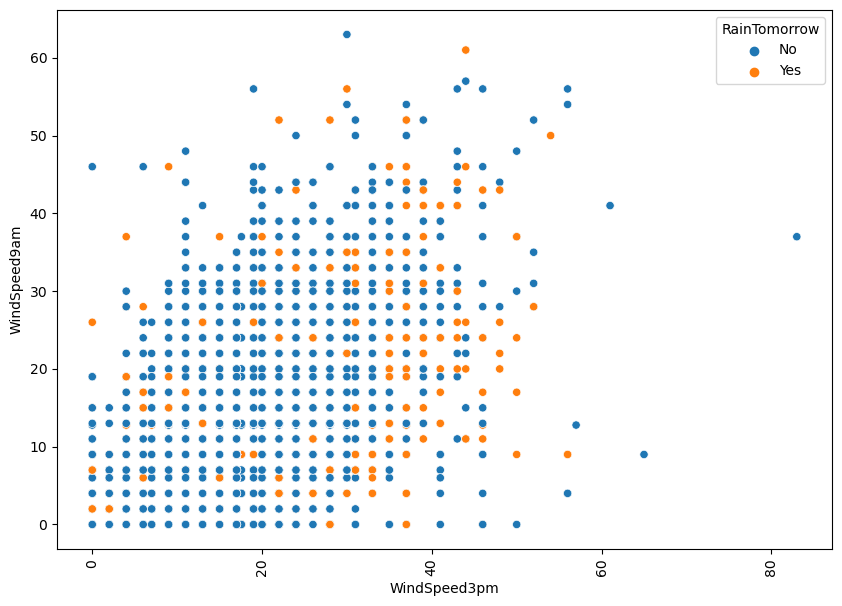

In [139]:
plt.figure(figsize=(10,7))
sns.scatterplot(y='WindSpeed9am',x='WindSpeed3pm',hue='RainTomorrow',data=data)
plt.xticks(rotation=90)
plt.show()

I am not seeing any linear relationship

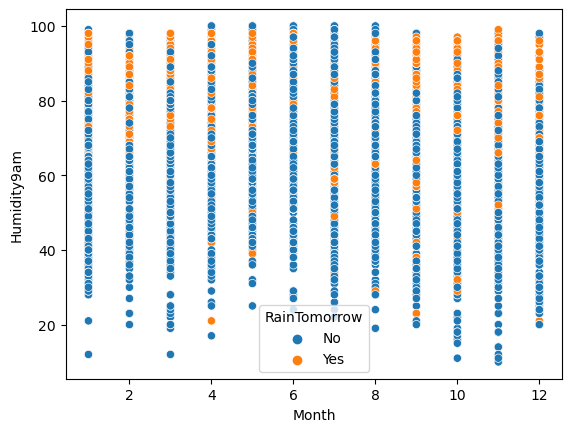

In [149]:
plt.figure()
sns.scatterplot(y='Humidity',x='Month',hue='RainTomorrow',data=data)
plt.show()

Humidity is more than 80 in all month. No rainfall is maximum than Yes rainfall in all month

 # Encoding of Object Data

In [21]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,5.302395,7.890896,W,44.0,W,WNW,...,1007.1,8.000000,4.320988,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.302395,7.890896,WNW,44.0,NNW,WSW,...,1007.8,4.336806,4.320988,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.302395,7.890896,WSW,46.0,W,WSW,...,1008.7,4.336806,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.302395,7.890896,NE,24.0,SE,E,...,1012.8,4.336806,4.320988,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.302395,7.890896,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [22]:
# Importing the necessary labraries 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj_col=("Location","WindGustDir","WindDir9am","WindDir3pm","RainToday",'RainTomorrow')
for i in obj_col:
    data[i]=le.fit_transform(data[i])

In [23]:
data.sample(n=15)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
194,1,1.800000,12.4,0.0,5.302395,7.890896,1,28.000000,0,4,...,1013.000000,4.336806,4.000000,5.900000,12.100000,0,0,13,6,2009
3537,11,20.100000,24.4,0.0,5.302395,7.890896,1,33.000000,2,0,...,1023.300000,6.000000,8.000000,21.300000,22.200000,0,1,11,3,2009
3279,10,19.700000,25.2,0.6,5.302395,7.890896,8,39.000000,9,0,...,1012.500000,8.000000,8.000000,21.000000,23.100000,0,0,19,1,2017
4909,5,13.900000,28.4,0.0,7.000000,9.600000,3,61.000000,3,3,...,1008.700000,3.000000,5.000000,20.900000,27.000000,0,1,29,10,2010
7700,8,16.800000,34.3,0.0,7.600000,10.500000,1,43.000000,1,5,...,1012.900000,1.000000,1.000000,25.400000,34.000000,0,0,3,4,2013
3251,10,19.900000,24.5,0.0,7.400000,7.890896,9,37.000000,0,0,...,1017.500000,8.000000,8.000000,21.300000,22.800000,0,0,22,12,2016
7364,8,14.000000,36.7,0.0,10.200000,11.600000,3,37.000000,4,15,...,1009.900000,1.000000,1.000000,28.000000,34.500000,0,0,4,3,2012
969,3,13.900000,20.8,4.2,1.000000,9.400000,12,37.000000,12,10,...,1020.400000,2.000000,4.000000,17.900000,20.200000,1,0,11,5,2009
6950,8,17.300000,33.9,0.0,9.800000,11.900000,2,57.000000,0,10,...,1007.900000,7.000000,1.000000,22.500000,33.200000,0,0,16,12,2010
393,1,18.700000,35.9,0.0,5.302395,7.890896,10,31.000000,1,4,...,1017.000000,4.336806,4.320988,25.600000,34.100000,0,0,29,12,2009


In [24]:
# checking their unique values after encoding method
data.nunique().to_frame('Unique Value')

,Unique Value
Location,12
MinTemp,286
MaxTemp,332
Rainfall,250
Evaporation,117
Sunshine,141
WindGustDir,16
WindGustSpeed,53
WindDir9am,16
WindDir3pm,16


Again I have confirmed that after encoding the object data their unique still remains same. 

# Checking the Data distribution 

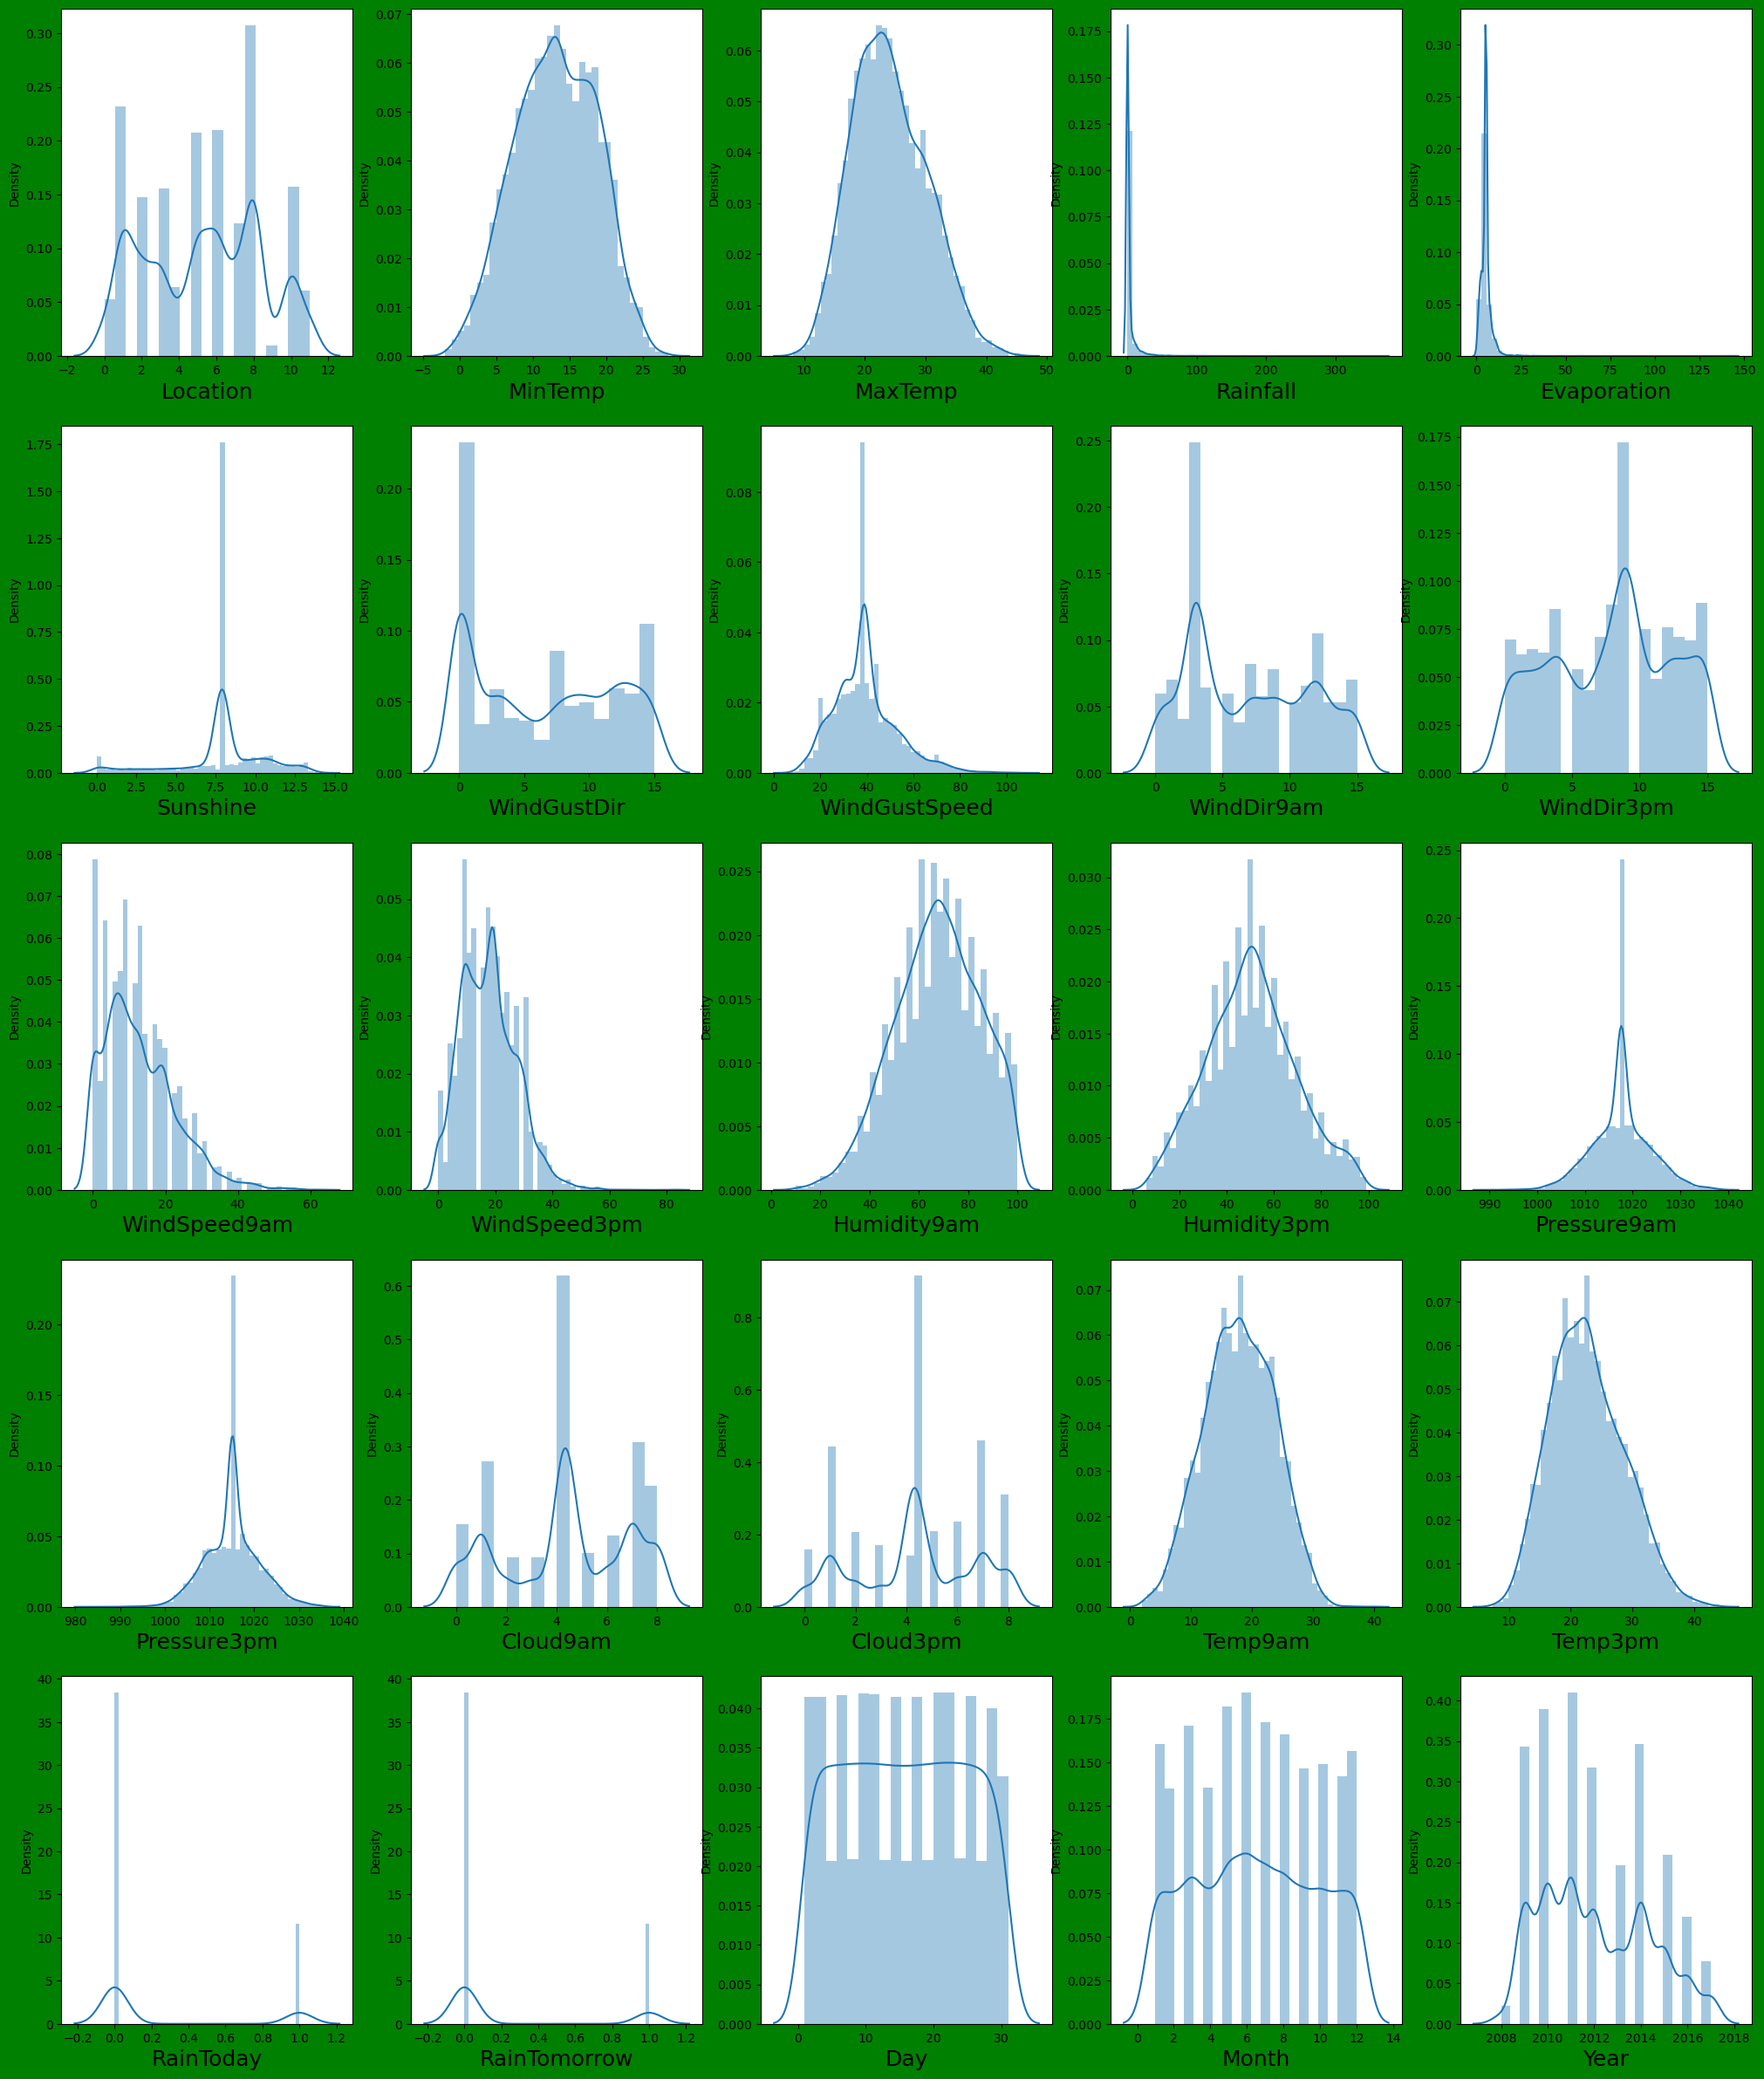

In [25]:
# Checking the data distribution 
plt.figure(figsize=(25,30), facecolor='g')
plotnumber = 1
for column in data:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize= 18)
    plotnumber +=1
plt.show()

### Analysis of the data distribution plot
- We can see, MinTemp, MAxTemp, Humidity3pm, Pressure9am, Temp9am and Temp3pm it seem to normaly distributed.
- WindSpeed9am and WindSpeed3pm has right skewness
- All categorical features are having some skewness.

In [26]:
# skewness values +0.5 : -0.5
data.skew()

Location         -0.000009
MinTemp          -0.083706
MaxTemp           0.327598
Rainfall         13.637400
Evaporation      13.553368
Sunshine         -0.882147
WindGustDir       0.105287
WindGustSpeed     0.780437
WindDir9am        0.220355
WindDir3pm       -0.123726
WindSpeed9am      0.957036
WindSpeed3pm      0.549797
Humidity9am      -0.256177
Humidity3pm       0.150860
Pressure9am       0.022085
Pressure3pm       0.042990
Cloud9am         -0.215085
Cloud3pm         -0.162159
Temp9am          -0.047213
Temp3pm           0.348100
RainToday         1.266937
RainTomorrow      1.266937
Day               0.006240
Month             0.021988
Year              0.354481
dtype: float64

RainFall, Evaporation,Sunshine,WindSpeed,WindSpeed9am,WindSpeed3pm,RainToday. There is skewness in all this columns. But before removing skewness lets ceck the outliers.

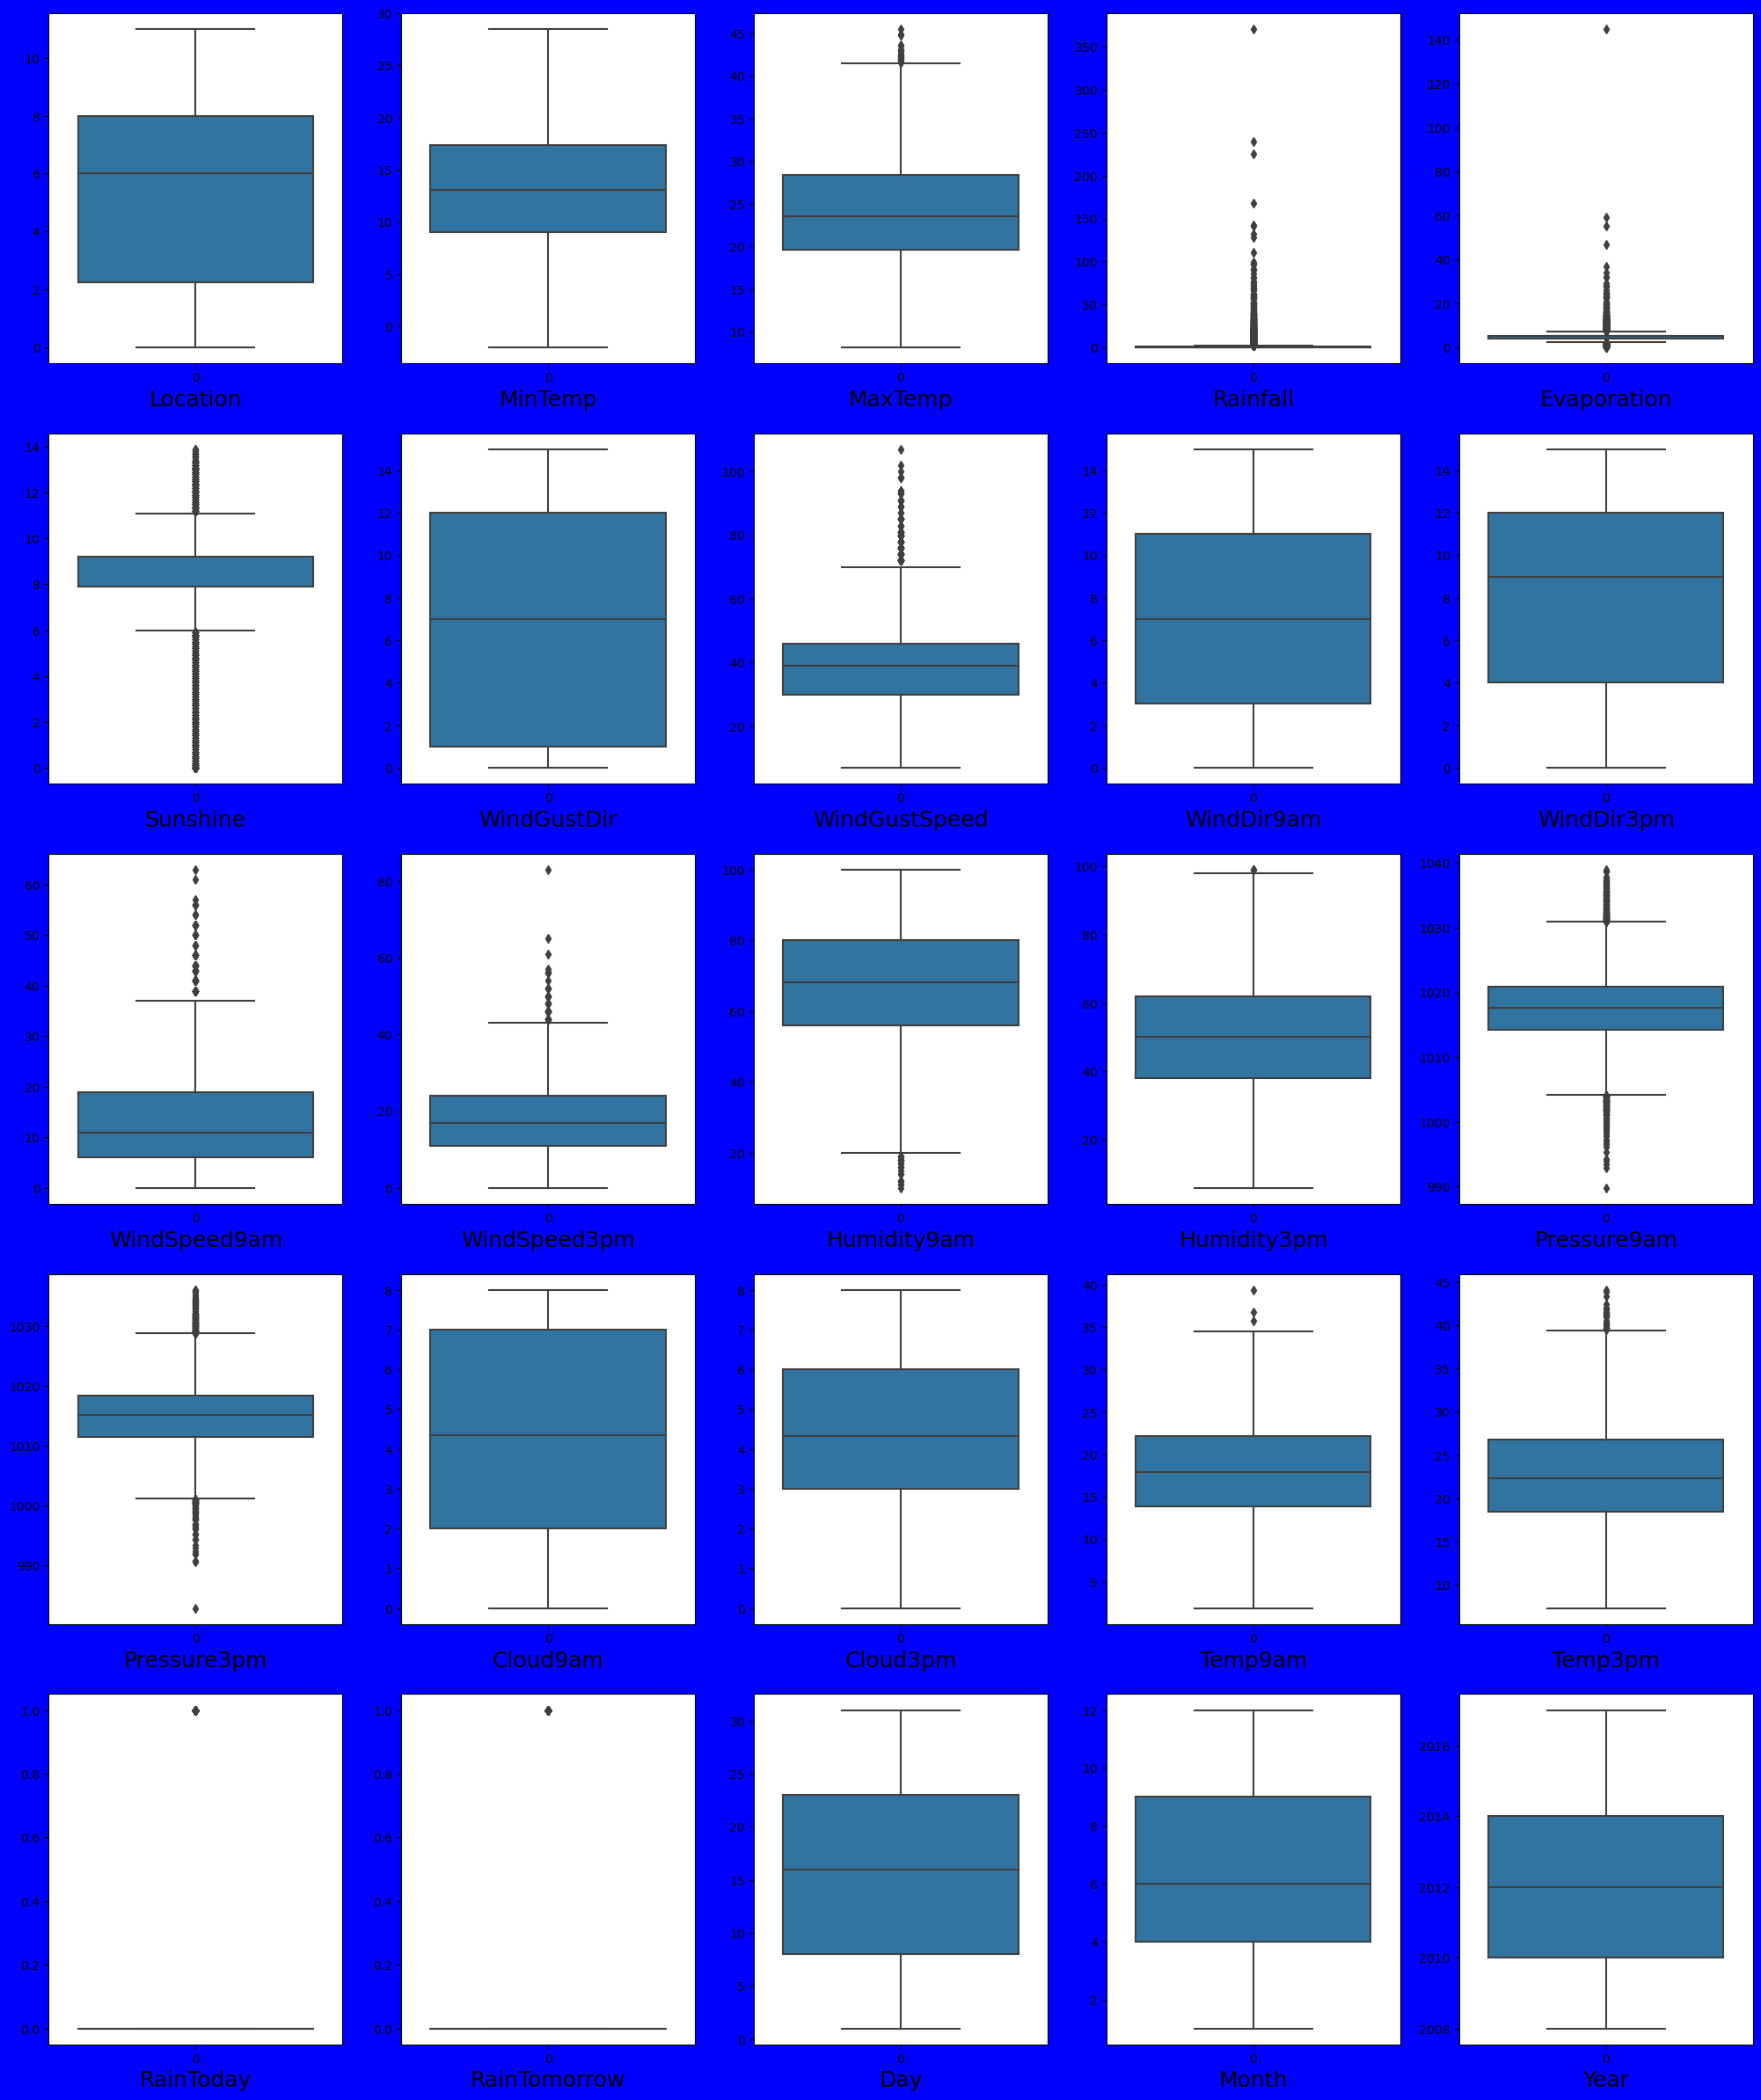

In [27]:
# Checking for outliers using box plot
plt.figure(figsize=(25,30), facecolor='b')
plotnumber = 1
for column in data:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize= 18)
    plotnumber +=1
plt.show()

MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temppam and Temp3pm are having Outliers.

# Removing Outliers Using Z Score Techniques

In [28]:
from scipy.stats import zscore
z_score = zscore(data[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
abs_z_score = np.abs(z_score) 
filtering_entry = (abs_z_score  < 3).all(axis=1)

new_data = data[filtering_entry]
print('Old Data Frame:', data.shape[0])
print('New Data Frame:', new_data.shape[0])
print('percentage of loss of data by zscore is :',(data.shape[0]-new_data.shape[0])/data.shape[0],'%')

Old Data Frame: 6762
New Data Frame: 6407
percentage of loss of data by zscore is : 0.05249926057379473 %


I am satisfied with the data lost because is not more than 5% of our original data. 

In [29]:
# Checking skewness after removing outliers. 
new_data.skew()

Location         0.003965
MinTemp         -0.078630
MaxTemp          0.265852
Rainfall         3.521311
Evaporation      0.720942
Sunshine        -0.888850
WindGustDir      0.104103
WindGustSpeed    0.476735
WindDir9am       0.211151
WindDir3pm      -0.128635
WindSpeed9am     0.677232
WindSpeed3pm     0.341098
Humidity9am     -0.233158
Humidity3pm      0.156727
Pressure9am      0.064072
Pressure3pm      0.090257
Cloud9am        -0.203224
Cloud3pm        -0.146926
Temp9am         -0.071943
Temp3pm          0.290030
RainToday        1.333123
RainTomorrow     1.332040
Day              0.004932
Month            0.032783
Year             0.352752
dtype: float64

# Removing skewness using log transformation


In [30]:
new_data["Rainfall"] = np.log1p(new_data["Rainfall"])
new_data["Evaporation"] = np.log1p(new_data["Evaporation"])
new_data["Sunshine"] = np.log1p(new_data["Sunshine"])
new_data["RainToday"] = np.log1p(new_data["RainToday"])


new_data.skew()

Location         0.003965
MinTemp         -0.078630
MaxTemp          0.265852
Rainfall         1.838505
Evaporation     -1.013342
Sunshine        -2.698585
WindGustDir      0.104103
WindGustSpeed    0.476735
WindDir9am       0.211151
WindDir3pm      -0.128635
WindSpeed9am     0.677232
WindSpeed3pm     0.341098
Humidity9am     -0.233158
Humidity3pm      0.156727
Pressure9am      0.064072
Pressure3pm      0.090257
Cloud9am        -0.203224
Cloud3pm        -0.146926
Temp9am         -0.071943
Temp3pm          0.290030
RainToday        1.333123
RainTomorrow     1.332040
Day              0.004932
Month            0.032783
Year             0.352752
dtype: float64

I have manage to reduced the skewness 

# Correlation of the features with target column

In [31]:
new_data.corr()['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.464068
Cloud3pm         0.351091
Rainfall         0.325920
RainToday        0.302807
Cloud9am         0.287082
Humidity9am      0.283474
WindGustSpeed    0.164265
MinTemp          0.092532
WindSpeed9am     0.043122
WindDir9am       0.035059
WindGustDir      0.034253
WindSpeed3pm     0.025748
Location         0.000945
WindDir3pm      -0.000374
Day             -0.002235
Month           -0.003271
Year            -0.004300
Temp9am         -0.026969
Evaporation     -0.104428
Pressure3pm     -0.113059
Pressure9am     -0.139694
MaxTemp         -0.158687
Temp3pm         -0.201939
Sunshine        -0.311077
Name: RainTomorrow, dtype: float64

In [32]:
new_data.corr()['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.903517
Humidity9am      0.386942
Humidity3pm      0.371723
RainTomorrow     0.325920
Cloud9am         0.296105
Cloud3pm         0.250189
WindDir9am       0.147439
WindGustDir      0.100142
WindDir3pm       0.098717
WindGustSpeed    0.091918
MinTemp          0.089729
WindSpeed9am     0.035976
WindSpeed3pm     0.021049
Location         0.005915
Year             0.000938
Month           -0.006811
Day             -0.007318
Pressure3pm     -0.043954
Temp9am         -0.073646
Pressure9am     -0.117825
Evaporation     -0.168156
MaxTemp         -0.207656
Sunshine        -0.211484
Temp3pm         -0.217933
Name: Rainfall, dtype: float64

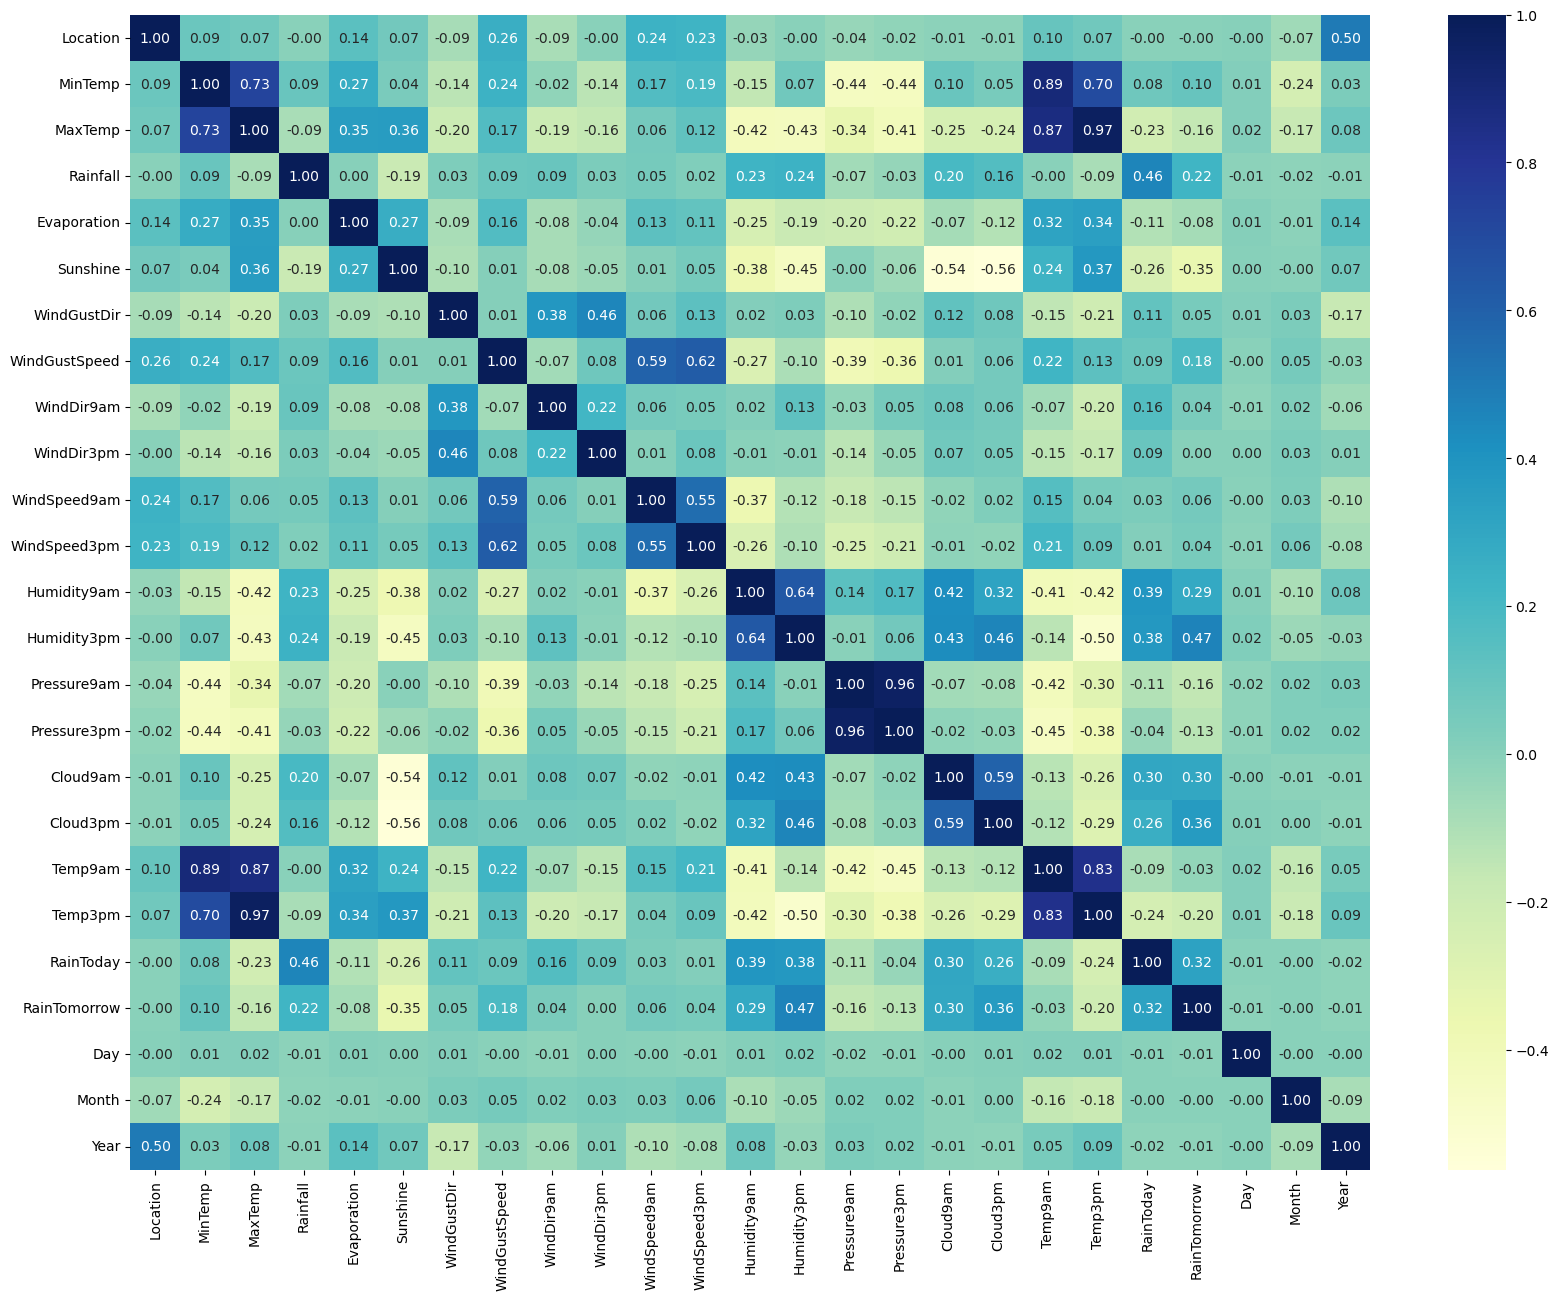

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot = True,fmt ='.2f', linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.show()

# Analysis of Correlation with RainTomorrow

- MaxTemp has 16% negative correlation with target column.
- Sunshine has 35% negative correlation with target column.
- Humidity9am has 29% positive correlation with target column.
- Humidity3pm has 47% positive correlation with target column.
- Cloud9am has 30% positive correlation with target columns.
- Cloud3pm has 36% positive correlation with target column.
- Temp3pm has 20% negative correlation with target column.
- RainToday has 32% positive correlation with target column.

# Analysis of Correlation with Rainfall
- MaxTemp has 09% negative correlation with target column.
- Sunshine has 19% negative correlation with target column.
- Humidity9am has 23% positive correlation with target column.
- Humidity3pm has 24% positive correlation with target column.
- Cloud9am has 20% positive correlation with target columns.
- Cloud3pm has 16% positive correlation with target column.
- Temp3pm has 09% negative correlation with target column.
- RainToday has 46% positive correlation with target column.

# Features correlation to each other causing multicollinearity problem
- MinTemp has 73% positive correlation with MaxTemp. Which can cause multicollinearity issue 
- Humidity9am has 64% positive correlation with Humidity3pm. Which can cause multicollinearity issue 
- Pressure9am has 96% positive correlation with Pressure3pm. Which can cause multicollinearity issue
- Temp9am has 83% positive correlation with Temp3pm. which can cause multicollinearity issue 
- Cloud9am has 57% positive correlation with Cloud3pm. Which can cause multicollinearity issue



# Visualizing the correlation between label and features using bar plot

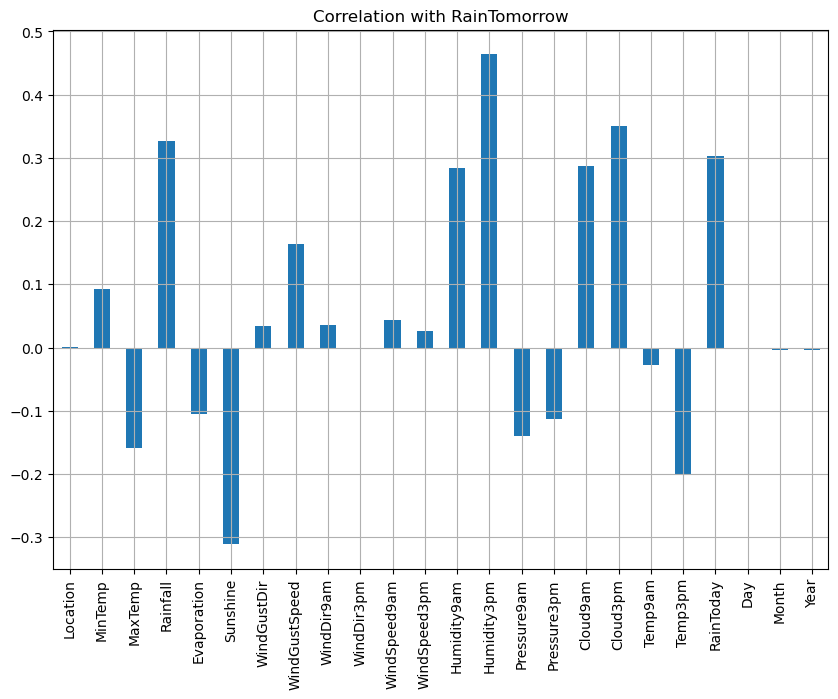

In [34]:
new_data.drop('RainTomorrow',axis= 1).corrwith(new_data.RainTomorrow).plot(kind = 'bar', grid=True,figsize=(10, 7),
                                                  title='Correlation with RainTomorrow')

plt.show()

The above bar plot shows correlationship between target and features, as we can see Locantion, Day, Month, Year fell on zero line meaning they have no relatipnship with target varaibles. I will be droping them but lets confirm their vif as I move further. 

# A. Predicting for RainTomorrow
# Seperating our features and label data into X and Y 

In [35]:
x = new_data.drop('RainTomorrow',axis=1)
y = new_data['RainTomorrow']

In [36]:
# Applying standard scaler to scale the features values 
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [37]:
x_scaled.shape[1]

24

23 columns have been scaled excluding our two target variable 

# Lets check for multicolinearity using VIF Score

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled, i) for
              i in range (x_scaled.shape[1])]
vif['features'] = x.columns 
print(vif)

          VIF       features
0    1.641160       Location
1    9.218120        MinTemp
2   26.380710        MaxTemp
3    5.673792       Rainfall
4    1.504499    Evaporation
5    1.644103       Sunshine
6    1.581162    WindGustDir
7    2.251417  WindGustSpeed
8    1.333353     WindDir9am
9    1.419416     WindDir3pm
10   2.055608   WindSpeed9am
11   1.942288   WindSpeed3pm
12   4.174370    Humidity9am
13   5.474135    Humidity3pm
14  20.082594    Pressure9am
15  19.352786    Pressure3pm
16   1.947537       Cloud9am
17   1.826880       Cloud3pm
18  17.969952        Temp9am
19  32.630033        Temp3pm
20   5.530157      RainToday
21   1.004644            Day
22   1.146145          Month
23   1.575473           Year


If VIF > 10, It means multicollinearity is present.

MultiCollinearity are exists in MaxTemp, Pressure9am, Pressure3pm, Temp9am and Temp3pm. Based on ANOVA F scores.

In [39]:
# Dropping Temp3pm, MaxTemp,Pressure3pm columns
x.drop(columns=["Temp3pm",'MaxTemp','Pressure3pm'],axis=1,inplace=True)

In [40]:
#Re-scaling the features after dropping the above columns
scalar1 = StandardScaler()
x_scaled1 = scalar1.fit_transform(x)

In [41]:
# checking vif score after re-scaling the data
new_vif = pd.DataFrame()
new_vif['VIF'] = [variance_inflation_factor(x_scaled1, i) for
              i in range (x_scaled1.shape[1])]
new_vif['features'] = x.columns 
new_vif

,VIF,features
0,1.637332,Location
1,9.103505,MinTemp
2,5.656855,Rainfall
3,1.475790,Evaporation
4,1.640733,Sunshine
5,1.568878,WindGustDir
6,2.233005,WindGustSpeed
7,1.279166,WindDir9am
8,1.358761,WindDir3pm
9,2.043569,WindSpeed9am


Multicollinearity issue has been solved and we will use the features to build the model

# Balancing Target Variable Using SMOT Techniques 

In [42]:
# Counter module to count each class
from collections import Counter
Counter(y)

Counter({0: 4979, 1: 1428})

The 0 class in our target column is more that 1 class which make the target imbalance

In [43]:
# importing over smapling 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, ys = oversample.fit_resample(x, y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of Classes after fit {}".format(Counter(ys)))

The number of classes before fit Counter({0: 4979, 1: 1428})
The number of Classes after fit Counter({0: 4979, 1: 4979})


Our target column has been balanced 

In [44]:
print(len(x),len(ys))

9958 9958


# Machine Learning

#### Finding the best RandomState using RandomForestClassifier

In [45]:
# importing RandomForestClassifier library and initiazing it 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

In [46]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,ys,test_size=.20, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9171686746987951  on Random_state  26


### Finding the best random state using Logistics Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [48]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,ys,test_size=30, random_state =i)
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9666666666666667  on Random_state  129


LogisticRegression gives the best accuracy of 96% at random state of 129

In [50]:
# Importing the necessary libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
dc = DecisionTreeClassifier()
etr = ExtraTreesClassifier()
svc = SVC()
knn = KNeighborsClassifier()
gdb = GradientBoostingClassifier()
ada = AdaBoostClassifier()

models = [dc,lr,rf,etr,svc,knn,gdb,ada]

In [52]:
for model in models:
    x_train, x_test, y_train, y_test= train_test_split(x,ys,test_size= 0.30, random_state=123)
    
    model.fit(x_train, y_train)
    model.fit(x_test, y_test)
    y_pred = model.predict(x_test)
      
    
    
    print(f'*************************{model}*************************')
    print('Train score:', model.score(x_train,y_train)*100) # checking model training score 
    print('Test Score:', model.score(x_test,y_test)*100) # checking model testing score 
    print ("The Accuracy is: ", accuracy_score(y_test, y_pred)*100)
    print ("The CV score is: ",(cross_val_score(model, x, ys, cv=5).mean())*100) #Cross Validation Score taken as 5
    print ("Difference between Accuracy_Score and CV score is: ",((accuracy_score(y_test, y_pred)*100)-((cross_val_score(model, x, ys, cv=5).mean())*100)))
    print ('\n')
   
    print("The Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
    print ('\n')
    
       
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print ("="*65)
    print('\n')

*************************DecisionTreeClassifier()*************************
Train score: 79.51219512195122
Test Score: 100.0
The Accuracy is:  100.0
The CV score is:  63.790773339465346
Difference between Accuracy_Score and CV score is:  36.05872510635207


The Confusion Matrix is: 
 [[1494    0]
 [   0 1494]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1494
           1       1.00      1.00      1.00      1494

    accuracy                           1.00      2988
   macro avg       1.00      1.00      1.00      2988
weighted avg       1.00      1.00      1.00      2988



*************************LogisticRegression()*************************
Train score: 77.66140602582496
Test Score: 77.40963855421687
The Accuracy is:  77.40963855421687
The CV score is:  70.81910262849489
Difference between Accuracy_Score and CV score is:  6.59053592572198


The Confusion Matrix is: 
 [[1173  321]
 [ 354 1140]]


Cl

### The above models result shows that SVM is our best model with an Accuracy score 72 and Cross Validation: 74. Simply because svc  has the least score between cross validation and accuracy which is -1.76

# Hyper Parameter Tunning 

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid  = {'C' :[1,5,10,20], # how many errors will can make base on the four options given 
                 'gamma': [0.001, 0.01,0.02,0.002]} 

In [54]:
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)
# best param
gridsearch.best_params_

{'C': 20, 'gamma': 0.01}

I have the best parameters to train our best model

In [55]:
svc = SVC(C= 10, gamma =0.01)
svc.fit(x_train,y_train)

SVC(C=10, gamma=0.01)

In [57]:
final_model = SVC(C= 20, gamma =0.01)
final_train_fit= final_model.fit(x_train,y_train)
final_test_fit=final_model.fit(x_test, y_test)
final_pred = final_model.predict(x_test)


print ("The Accuracy is: ", accuracy_score(y_test, final_pred)*100)
print ("The CV score is: ",(cross_val_score(final_model, x, ys, cv=5).mean())*100) 
print("The Confusion Matrix is: \n", confusion_matrix(y_test, final_pred))
print ('\n')
print("Classification Report: \n", classification_report(y_test, final_pred))
print ("="*65)
print('\n')

The Accuracy is:  99.9330655957162
The CV score is:  90.63145600987576
The Confusion Matrix is: 
 [[1492    2]
 [   0 1494]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1494
           1       1.00      1.00      1.00      1494

    accuracy                           1.00      2988
   macro avg       1.00      1.00      1.00      2988
weighted avg       1.00      1.00      1.00      2988





# After tuning the best model there was an increased in accuracy score from 72.99% to 99.89%, also there was an increased in Cross Validation Score from 74.45% to 90.55%

# AUC ROC Curve

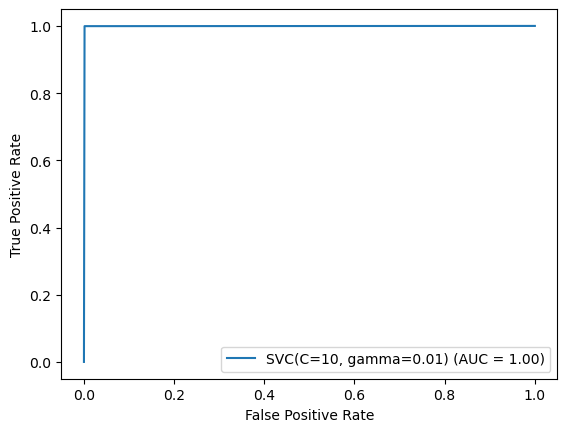

In [394]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, final_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()

Achieved final accuracy score of 99.89% and Cross Validation Score of 90.55% and also AUC score is 100% which is fantastic.

# Saving Model 

In [395]:
import pickle
filename = 'Rainfall_Weather_Forcast_Proj_classification.pkl'
pickle.dump(final_model, open(filename, 'wb'))

# Predicting with saved model

In [396]:
actual=np.array(y_test)
model_pred =np.array(final_model.predict(x_test))
df_ac_pred = pd.DataFrame({"original":actual,"predicted":model_pred},index= range(len(actual)))
df_ac_pred

,original,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
2983,0,0
2984,1,1
2985,0,0
2986,0,0


 # B. Prediction for Rainfall

In [405]:
new_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.470004,1.84093,2.185028,13,44.0,13,14,...,1007.1,8.000000,4.320988,16.9,21.8,0.0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.84093,2.185028,14,44.0,6,15,...,1007.8,4.336806,4.320988,17.2,24.3,0.0,0,2,12,2008
2,1,12.9,25.7,0.000000,1.84093,2.185028,15,46.0,13,15,...,1008.7,4.336806,2.000000,21.0,23.2,0.0,0,3,12,2008
3,1,9.2,28.0,0.000000,1.84093,2.185028,4,24.0,9,0,...,1012.8,4.336806,4.320988,18.1,26.5,0.0,0,4,12,2008
4,1,17.5,32.3,0.693147,1.84093,2.185028,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,5,12,2008


# Seperating our features and label data into X and Y 

In [58]:
x_fall = new_data.drop('Rainfall',axis=1)
y_fall = new_data['Rainfall']

In [59]:
x_fall.shape

(6407, 24)

In [60]:
y_fall.shape

(6407,)

In [61]:
# Applying standard scaler to scale the features values 
from sklearn.preprocessing import StandardScaler
scalar_fall = StandardScaler()
x_fall_scaled = scalar_fall.fit_transform(x_fall)

In [62]:
x_fall_scaled.shape[1]

24

# Lets check for multicolinearity using VIF Score

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_f = pd.DataFrame()
vif_f['VIF_f'] = [variance_inflation_factor(x_fall_scaled, i) for
              i in range (x_fall_scaled.shape[1])]
vif_f['features'] = x_fall.columns 
print(vif_f)

        VIF_f       features
0    1.648459       Location
1    9.225193        MinTemp
2   26.386576        MaxTemp
3    1.504318    Evaporation
4    1.661044       Sunshine
5    1.584957    WindGustDir
6    2.325974  WindGustSpeed
7    1.332471     WindDir9am
8    1.420848     WindDir3pm
9    2.054739   WindSpeed9am
10   1.946870   WindSpeed3pm
11   4.142037    Humidity9am
12   5.740027    Humidity3pm
13  20.106875    Pressure9am
14  19.437033    Pressure3pm
15   1.945940       Cloud9am
16   1.841471       Cloud3pm
17  17.958650        Temp9am
18  32.618999        Temp3pm
19   1.402070      RainToday
20   1.471205   RainTomorrow
21   1.004852            Day
22   1.146181          Month
23   1.581238           Year


If VIF > 10, It means multicollinearity is present.

MultiCollinearity are exists in MaxTemp, Pressure9am, Pressure3pm, Temp9am and Temp3pm. Based on ANOVA F scores.

In [64]:
# Dropping Temp3pm, MaxTemp,Pressure3pm columns
x_fall.drop(columns=["Temp3pm",'MaxTemp','Pressure3pm'],axis=1,inplace=True)

In [65]:
#Re-scaling the features after dropping the above columns
scalar_fall1 = StandardScaler()
x_fall_scaled1 = scalar_fall1.fit_transform(x_fall)

In [66]:
# checking vif score after re-scaling the data
new_vif_f = pd.DataFrame()
new_vif_f['VIF'] = [variance_inflation_factor(x_fall_scaled1, i) for
              i in range (x_fall_scaled1.shape[1])]
new_vif_f['features'] = x_fall.columns 
new_vif_f

,VIF,features
0,1.645601,Location
1,9.114304,MinTemp
2,1.475598,Evaporation
3,1.656622,Sunshine
4,1.571750,WindGustDir
5,2.309646,WindGustSpeed
6,1.278309,WindDir9am
7,1.361939,WindDir3pm
8,2.042204,WindSpeed9am
9,1.915891,WindSpeed3pm


All the VIF values are < 10, that means there is no multicollinearity problem. I will proceed and use this features to build the models

# Machine Learning 

### find the best random state 

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Using RandomForestRegressor to find the best Random State 

In [68]:
rdr= RandomForestRegressor()
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_fall,y_fall,test_size=30, random_state=i)
    rdr.fit(x_train, y_train)
    pred = rdr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"  at Random_state ",maxRS)

Maximum r2 score is  0.9614703006722394   at Random_state  96


In [70]:
# Importing the neccessary libraries for model building 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import GridSearchCV

# Linear Regression 

In [71]:
# Training Model 
lrm = LinearRegression()
lrm.fit(x_train,y_train)
print('LRM Train score:', lrm.score(x_train,y_train)*100) # checking model training score 
print('LRM Test Score:', lrm.score(x_test,y_test)*100) # checking model testing score 
lrm_pred = lrm.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,lrm_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,lrm_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,lrm_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,lrm_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(lrm, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':lrm_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

LRM Train score: 82.41431425125081
LRM Test Score: 80.65339969940781

MAE: 0.27598767327265167
MSE: 0.16864904594513513
RMSE: 0.4106690223831536
R2 score 80.65339969940781
Cross Validation Score is: 82.04692659907585
R2 Score - Cross Validation Score is -1.3935268996680321


,Actual,Model Prediction
2023,0.000000,0.073663
7791,1.386294,1.910869
4877,0.182322,0.116289
6306,0.182322,-0.020209
2620,1.029619,1.922620
3224,0.000000,0.053018
1274,2.653242,2.039567
22,0.000000,0.074517
6617,1.945910,1.975321
1231,0.587787,0.195379


# RandomForestRegressor

In [72]:
rdr= RandomForestRegressor()
rdr.fit(x_train,y_train)
print('RDR Train score:', rdr.score(x_train,y_train)*100) # checking model training score 
print('LRM Test Score:', rdr.score(x_test,y_test)*100) # checking model testing score 
rdr_pred = rdr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,rdr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,rdr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,rdr_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,rdr_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(rdr, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':rdr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)


RDR Train score: 97.69994400091164
LRM Test Score: 84.45724734279852

MAE: 0.2494871942708204
MSE: 0.1354899758237114
RMSE: 0.3680896301496572
R2 score 84.45724734279852
Cross Validation Score is: 82.30275877911441
R2 Score - Cross Validation Score is 2.1544885636841116


,Actual,Model Prediction
2023,0.000000,0.003365
7791,1.386294,2.102740
4877,0.182322,0.048475
6306,0.182322,0.030051
2620,1.029619,1.824255
3224,0.000000,0.023831
1274,2.653242,2.264933
22,0.000000,0.106413
6617,1.945910,2.031136
1231,0.587787,0.095777


# ExtraTreesRegressor

In [73]:
etr= ExtraTreesRegressor()
etr.fit(x_train,y_train)
print('ETR Train score:', etr.score(x_train,y_train)*100) # checking model training score 
print('ETR Test Score:', etr.score(x_test,y_test)*100) # checking model testing score 
etr_pred = etr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,etr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,etr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,etr_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,etr_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(etr, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':etr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

ETR Train score: 100.0
ETR Test Score: 83.17675668714584

MAE: 0.256651726225223
MSE: 0.1466523260073183
RMSE: 0.38295211973211263
R2 score 83.17675668714584
Cross Validation Score is: 82.2058979628084
R2 Score - Cross Validation Score is 0.9708587243374467


,Actual,Model Prediction
2023,0.000000,0.027583
7791,1.386294,1.875622
4877,0.182322,0.071204
6306,0.182322,0.045066
2620,1.029619,1.888651
3224,0.000000,0.033275
1274,2.653242,2.318971
22,0.000000,0.090285
6617,1.945910,2.105074
1231,0.587787,0.107770


# GradientBoostingRegressor

In [74]:
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print('GBR Train score:', gbr.score(x_train,y_train)*100) # checking model training score 
print('GBR Test Score:', gbr.score(x_test,y_test)*100) # checking model testing score 
gbr_pred = gbr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,gbr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,gbr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,gbr_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,gbr_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(gbr, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':gbr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

GBR Train score: 86.32298988082533
GBR Test Score: 80.98798043014472

MAE: 0.2604213864362625
MSE: 0.16573242389507506
RMSE: 0.40710247345732875
R2 score 80.98798043014472
Cross Validation Score is: 82.39409329791394
R2 Score - Cross Validation Score is -1.4061128677692238


,Actual,Model Prediction
2023,0.000000,0.054169
7791,1.386294,1.863872
4877,0.182322,0.070197
6306,0.182322,0.029899
2620,1.029619,2.058344
3224,0.000000,0.013141
1274,2.653242,2.292097
22,0.000000,0.044549
6617,1.945910,1.855907
1231,0.587787,0.082058


# # XGBRegressor

In [75]:
xgb = xgb.XGBRegressor() 
xgb.fit(x_train,y_train)
print('XGB Train score:', xgb.score(x_train,y_train)*100) # checking model training score 
print('XGB Test Score:', xgb.score(x_test,y_test)*100) # checking model testing score 
xgb_pred = xgb.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,xgb_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,xgb_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,xgb_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,xgb_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(xgb, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':xgb_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

XGB Train score: 98.71832748035716
XGB Test Score: 78.62285791849943

MAE: 0.2770346040858416
MSE: 0.18634977520925558
RMSE: 0.4316824935172326
R2 score 78.62285791849943
Cross Validation Score is: 80.35695450565244
R2 Score - Cross Validation Score is -1.7340965871530045


,Actual,Model Prediction
2023,0.000000,0.064847
7791,1.386294,1.899176
4877,0.182322,0.125632
6306,0.182322,0.017871
2620,1.029619,1.906360
3224,0.000000,0.016783
1274,2.653242,2.052307
22,0.000000,0.069072
6617,1.945910,1.694992
1231,0.587787,-0.042031


# AdaBoostRegressor

In [76]:
ada = AdaBoostRegressor() 
ada.fit(x_train,y_train)
print('ADA Train score:', ada.score(x_train,y_train)*100) # checking model training score 
print('ADA Test Score:', ada.score(x_test,y_test)*100) # checking model testing score 
ada_pred = ada.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,ada_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,ada_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,ada_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,ada_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(ada, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':ada_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

ADA Train score: 82.93055074712514
ADA Test Score: 77.64344676560336

MAE: 0.29453341648189213
MSE: 0.1948875417396828
RMSE: 0.44146069104698643
R2 score 77.64344676560336
Cross Validation Score is: 82.12367620952172
R2 Score - Cross Validation Score is -4.480229443918361


,Actual,Model Prediction
2023,0.000000,0.071978
7791,1.386294,1.880757
4877,0.182322,0.053899
6306,0.182322,0.043199
2620,1.029619,2.101543
3224,0.000000,0.053899
1274,2.653242,2.168425
22,0.000000,0.046824
6617,1.945910,2.168425
1231,0.587787,0.122205


# KNeighborsRegressor

In [78]:
knn = KNeighborsRegressor() # initializing model 
knn.fit(x_train,y_train) # Training model
print('KNN Train score:', knn.score(x_train,y_train)*100) # checking model training score 
print('KNN Test Score:', knn.score(x_test,y_test)*100) # checking model testing score 
knn_pred = knn.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,knn_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,knn_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,knn_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,knn_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(knn, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':knn_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

KNN Train score: 49.90292733735684
KNN Test Score: 33.848964547559476

MAE: 0.531776344630653
MSE: 0.5766547529797995
RMSE: 0.759377872326946
R2 score 33.848964547559476
Cross Validation Score is: 16.580656201377973
R2 Score - Cross Validation Score is 17.268308346181502


,Actual,Model Prediction
2023,0.000000,0.000000
7791,1.386294,1.195963
4877,0.182322,0.000000
6306,0.182322,0.000000
2620,1.029619,1.522838
3224,0.000000,0.924995
1274,2.653242,1.845616
22,0.000000,0.607758
6617,1.945910,1.576457
1231,0.587787,1.008116


#  DecisionTreeRegressor

In [79]:
dcr = DecisionTreeRegressor()
dcr.fit(x_train,y_train)
print('DCR Train score:', dcr.score(x_train,y_train)*100) # checking model training score 
print('DCR Test Score:', dcr.score(x_test,y_test)*100) # checking model testing score 
dcr_pred = dcr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,dcr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,dcr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,dcr_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,dcr_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(dcr, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':dcr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

DCR Train score: 100.0
DCR Test Score: 69.92169674863442

MAE: 0.34357949236969004
MSE: 0.2621999249571507
RMSE: 0.5120546113034729
R2 score 69.92169674863442
Cross Validation Score is: 66.97143172034608
R2 Score - Cross Validation Score is 2.9502650282883423


,Actual,Model Prediction
2023,0.000000,0.000000
7791,1.386294,2.379546
4877,0.182322,0.470004
6306,0.182322,0.000000
2620,1.029619,1.974081
3224,0.000000,0.000000
1274,2.653242,1.974081
22,0.000000,0.000000
6617,1.945910,3.100092
1231,0.587787,0.182322


# L1 -- Lasso Regression

In [80]:
lsr = Lasso(alpha=0.001)
lsr.fit(x_train,y_train)
print('LSR Train score:', lsr.score(x_train,y_train)*100) # checking model training score 
print('LSR Test Score:', lsr.score(x_test,y_test)*100) # checking model testing score 
lsr_pred = lsr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,lsr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,lsr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,lsr_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,lsr_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(lsr, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':lsr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

LSR Train score: 82.40989775465081
LSR Test Score: 80.60744572280689

MAE: 0.27606823301426425
MSE: 0.1690496379970056
RMSE: 0.411156464131364
R2 score 80.60744572280689
Cross Validation Score is: 82.05487168433962
R2 Score - Cross Validation Score is -1.4474259615327298


,Actual,Model Prediction
2023,0.000000,0.079139
7791,1.386294,1.909477
4877,0.182322,0.123427
6306,0.182322,-0.018772
2620,1.029619,1.920366
3224,0.000000,0.063136
1274,2.653242,2.030256
22,0.000000,0.076145
6617,1.945910,1.953545
1231,0.587787,0.194259


# L2  Ridge Regression

In [81]:
rgr = RidgeCV(alphas=0.001) 
rgr.fit(x_train,y_train)
print('RGR Train score:', rgr.score(x_train,y_train)*100) # checking model training score 
print('RGR Test Score:', rgr.score(x_test,y_test)*100) # checking model testing score 
rgr_pred = rgr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,rgr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,rgr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,rgr_pred)))# Checking model performance and accuracy using RMSE
r2= r2_score(y_test,rgr_pred)*100 # Checking model performance and accuracy using R2 SCORE
print('R2 score',r2)
# Cross Validation Score
cv_score = (cross_val_score(rgr, x_fall, y_fall, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)
# Result of r2 score - cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':rgr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

RGR Train score: 82.41431425085872
RGR Test Score: 80.65342413782686

MAE: 0.2759876466795295
MSE: 0.16864883290945992
RMSE: 0.4106687630067083
R2 score 80.65342413782686
Cross Validation Score is: 82.04692121915672
R2 Score - Cross Validation Score is -1.3934970813298548


,Actual,Model Prediction
2023,0.000000,0.073664
7791,1.386294,1.910866
4877,0.182322,0.116291
6306,0.182322,-0.020208
2620,1.029619,1.922617
3224,0.000000,0.053019
1274,2.653242,2.039565
22,0.000000,0.074519
6617,1.945910,1.975319
1231,0.587787,0.195381


### The above models result shows that ExtraTreesRegressor is our best model with an R2 score of 84.56 and Cross Validation of 82.49 Simply because RandomForestRegressor  has the least score between cross validation and R2 Score accuracy which is -0.07 and highest R2score and CV


In [82]:
df_pred = pd.DataFrame({'Actual':y_test, 'ADA':ada_pred,'Ridge':rgr_pred,'Lissa':lsr_pred,'KNN':knn_pred,'XGBR':xgb_pred,'GDBR':gbr_pred,'ETR':etr_pred,'RDF':rdr_pred,'LR':lrm_pred,'DCR':dcr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(30)

,Actual,ADA,Ridge,Lissa,KNN,XGBR,GDBR,ETR,RDF,LR,DCR
2023,0.000000,0.071978,0.073664,0.079139,0.000000,0.064847,0.054169,0.027583,0.003365,0.073663,0.000000
7791,1.386294,1.880757,1.910866,1.909477,1.195963,1.899176,1.863872,1.875622,2.102740,1.910869,2.379546
4877,0.182322,0.053899,0.116291,0.123427,0.000000,0.125632,0.070197,0.071204,0.048475,0.116289,0.470004
6306,0.182322,0.043199,-0.020208,-0.018772,0.000000,0.017871,0.029899,0.045066,0.030051,-0.020209,0.000000
2620,1.029619,2.101543,1.922617,1.920366,1.522838,1.906360,2.058344,1.888651,1.824255,1.922620,1.974081
3224,0.000000,0.053899,0.053019,0.063136,0.924995,0.016783,0.013141,0.033275,0.023831,0.053018,0.000000
1274,2.653242,2.168425,2.039565,2.030256,1.845616,2.052307,2.292097,2.318971,2.264933,2.039567,1.974081
22,0.000000,0.046824,0.074519,0.076145,0.607758,0.069072,0.044549,0.090285,0.106413,0.074517,0.000000
6617,1.945910,2.168425,1.975319,1.953545,1.576457,1.694992,1.855907,2.105074,2.031136,1.975321,3.100092
1231,0.587787,0.122205,0.195381,0.194259,1.008116,-0.042031,0.082058,0.107770,0.095777,0.195379,0.182322


Data Frame of random 30 predcition of all models compare to Actual prediction

# Hyper Parameter Tunning 

In [83]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [84]:
params = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1],
              'random_state' : [None, 96],
              'n_estimators': [100, 200, 300]}



In [85]:
grd = GridSearchCV(etr, params, cv=5)
grd.fit(x_train, y_train)
print('best_params = >', grd.best_params_)

best_params = > {'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 100, 'n_jobs': -1, 'random_state': None}


In [94]:
tuned_model = ExtraTreesRegressor(criterion = 'squared_error', max_features= 'log2', n_estimators= 300, n_jobs = -1, random_state= 96)
tuned_fit = tuned_model.fit(x_train,y_train) 
tuned_pred = tuned_model.predict(x_test)

In [98]:
tuned_r2= r2_score(y_test,tuned_pred)*100 # final r2 score
print('final R2 score',tuned_r2)
tuned_mae = mean_absolute_error(y_test,rgr_pred)# Checking tuned model performance and accuracy using MAE
print('\n final MAE:',tuned_mae)
tuned_mse = mean_squared_error(y_test,rgr_pred)# Checking tuned model performance and accuracy using MSE
print('final MSE:',tuned_mse) 
tuned_rmse = np.sqrt(mean_squared_error(y_test,rgr_pred))# Checking tuned model performance and accuracy using RMSE
print('final RMSE:', tuned_rmse)

tuned_cv_score = (cross_val_score(tuned_model, x_fall, y_fall, cv=5).mean())*100 # tuned Cross Validation Score
print("Cross Validation Score is:", tuned_cv_score)


df_tuned_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':tuned_pred})#Creating DataFrame for Actual score and tuned Model Prediction
df_tuned_pred.head(10)


final R2 score 83.76835425984774

 final MAE: 0.2759876466795295
final MSE: 0.16864883290945992
final RMSE: 0.4106687630067083
Cross Validation Score is: 82.53869001762725


,Actual,Model Prediction
2023,0.000000,0.039944
7791,1.386294,1.772686
4877,0.182322,0.122373
6306,0.182322,0.047191
2620,1.029619,1.773416
3224,0.000000,0.050357
1274,2.653242,2.062067
22,0.000000,0.094929
6617,1.945910,2.024599
1231,0.587787,0.209793


After tuning our best model the accuracy score did not increase but our cross validation score increase 

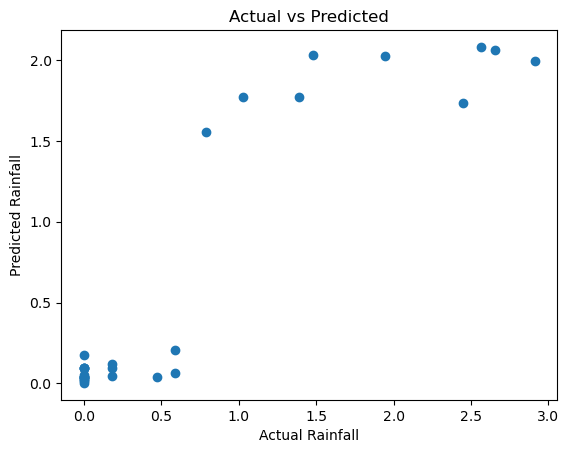

In [99]:
#Visualizing Actual Rainfall  and tuned model prediction 
plt.scatter(y_test,tuned_pred)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted')
plt.show()

# Saving the tuned model 

In [100]:
# saving the tunned model with pickle 
import pickle
filename = 'Rainfall_Prediction_Weather_Forecasting_Proj_Rainfall_tuned_model.pkl'
pickle.dump(tuned_model, open(filename, 'wb'))

In [104]:
# Prediction saved tuned model
import numpy as np
actual=np.array(y_test)
tuned_predicted=np.array(tuned_model.predict(x_test))
df= pd.DataFrame({"original":actual,"predicted":tuned_predicted},index= range(len(actual)))
df.head(10)

,original,predicted
0,0.000000,0.039944
1,1.386294,1.772686
2,0.182322,0.122373
3,0.182322,0.047191
4,1.029619,1.773416
5,0.000000,0.050357
6,2.653242,2.062067
7,0.000000,0.094929
8,1.945910,2.024599
9,0.587787,0.209793
